# Libraries

In [603]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss, auc
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import shap

# Confirm Data File Path

In [2]:
path="HR-Employee-Attrition.csv"
os.path.isfile("HR-Employee-Attrition.csv")

True

# Read and Preview Data

In [612]:
df = pd.read_csv(path)
print(f"\n{df.shape}\n\n")
df.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

# Check for Missing values and data types

In [4]:
print(f"\nSummary of missing values")
print(df.isnull().sum())
print("\nData types of each columns:")
print(df.dtypes)


Summary of missing values
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

# Plot Raw Data

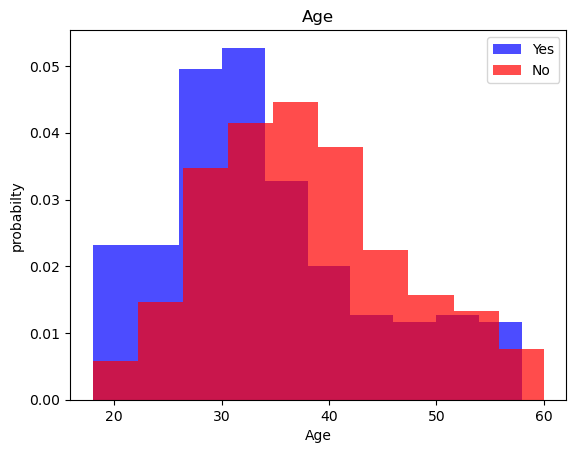

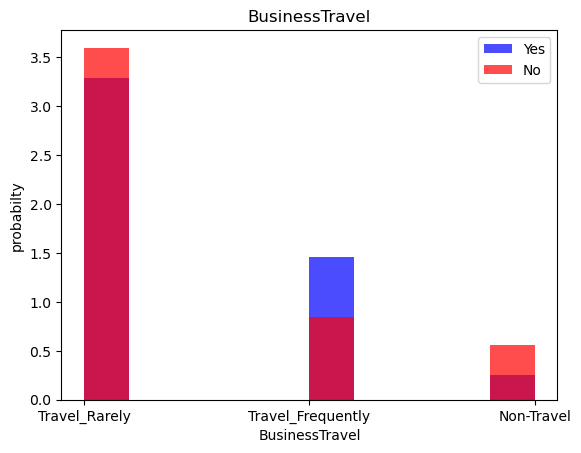

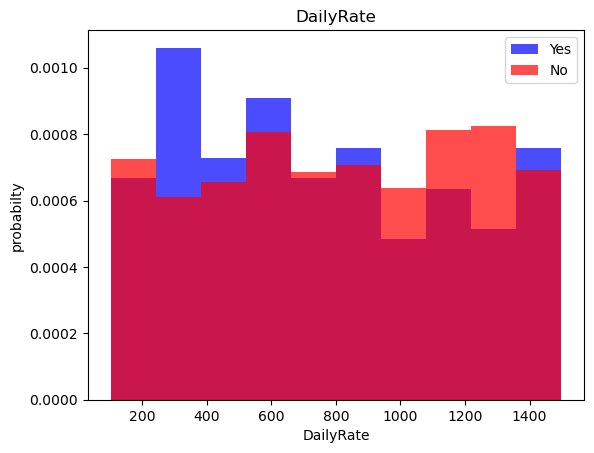

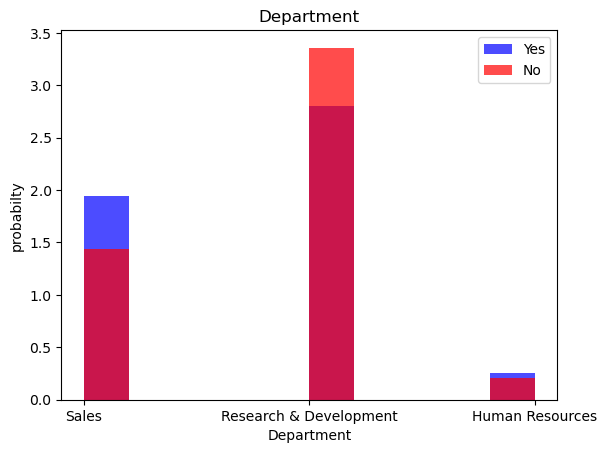

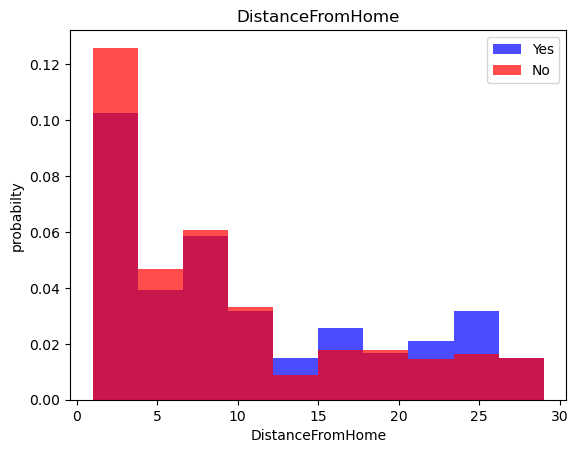

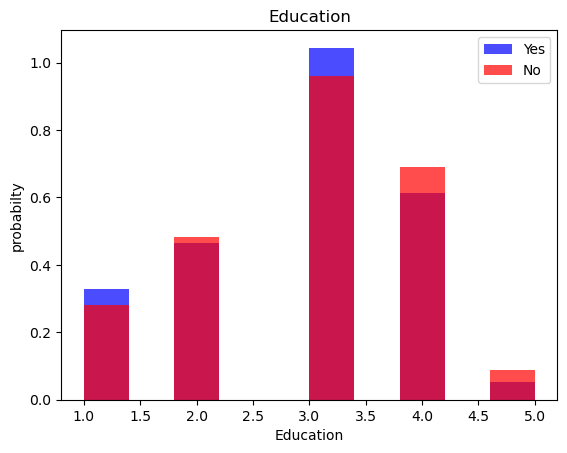

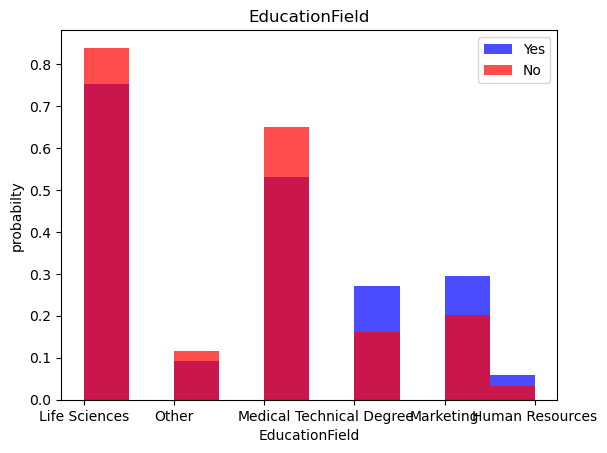

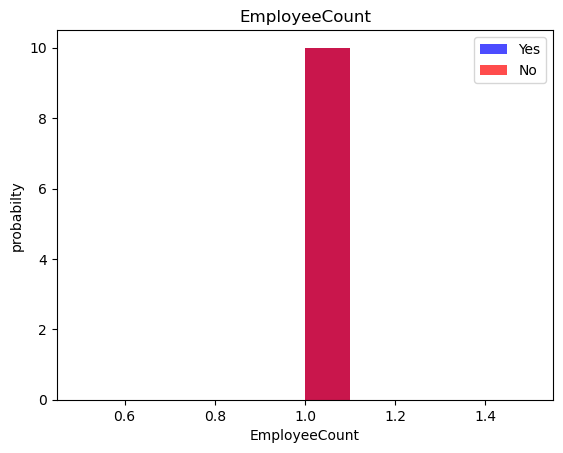

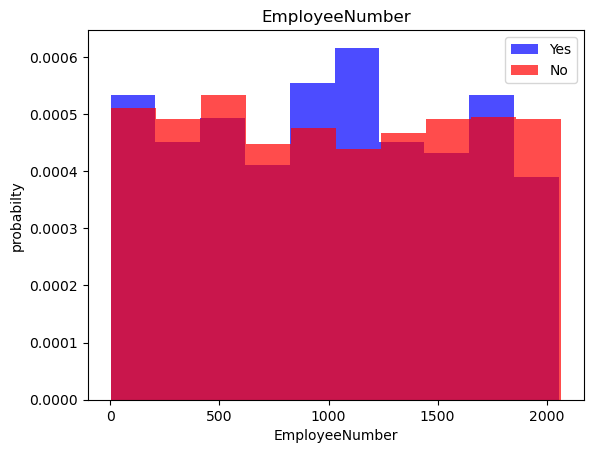

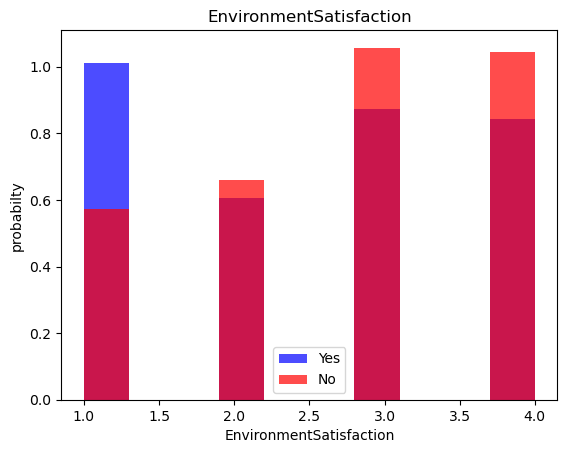

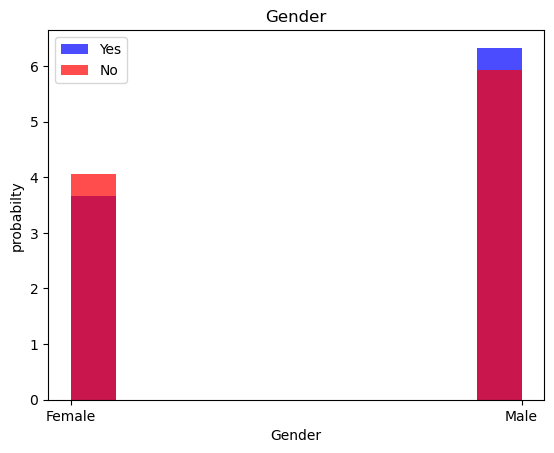

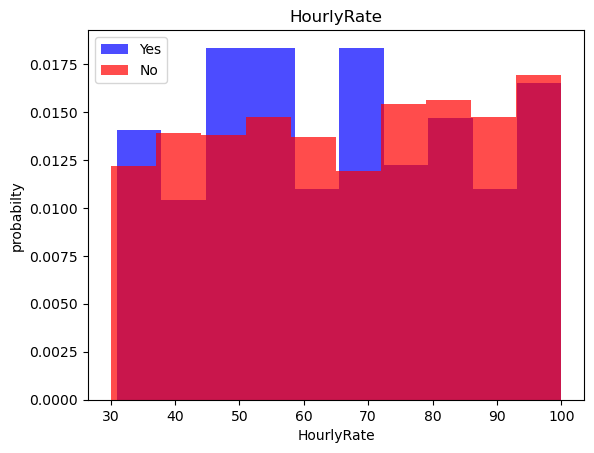

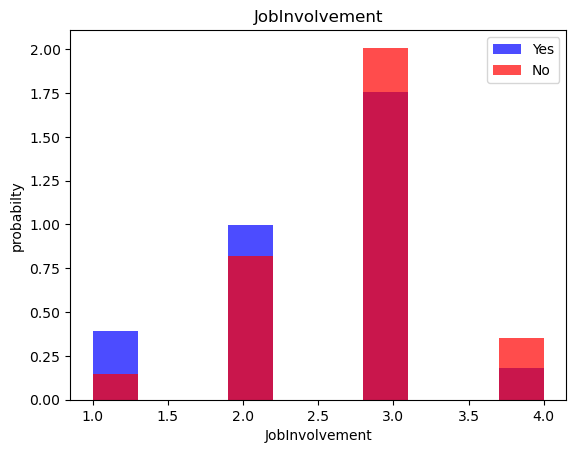

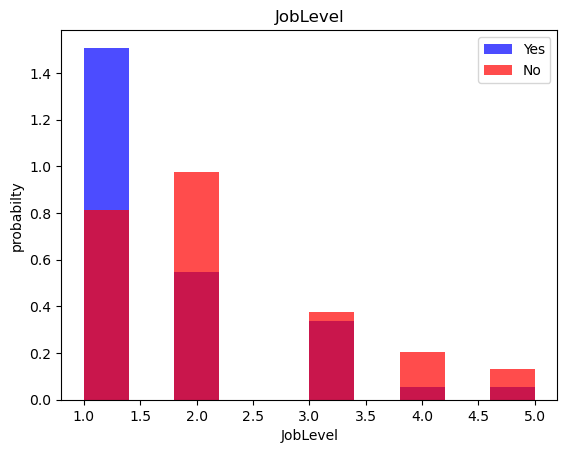

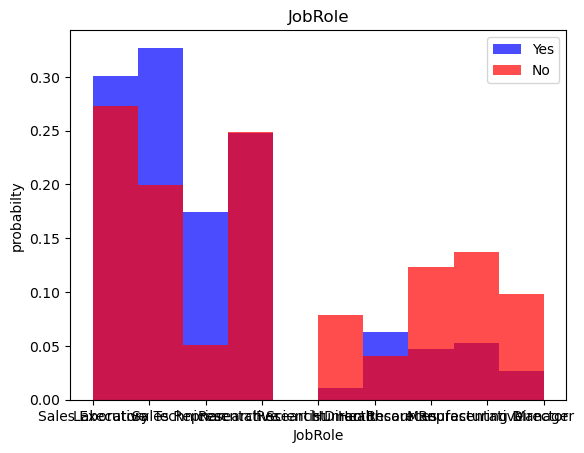

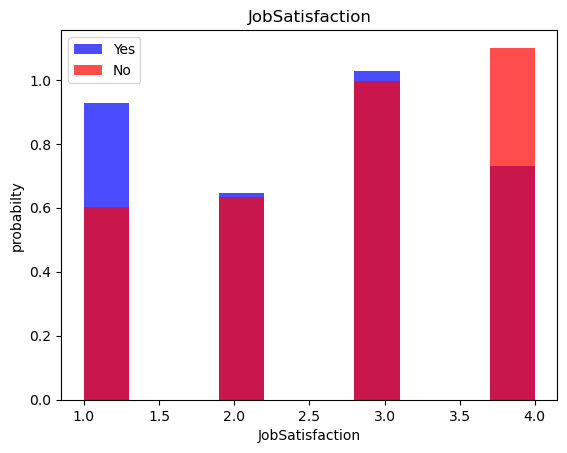

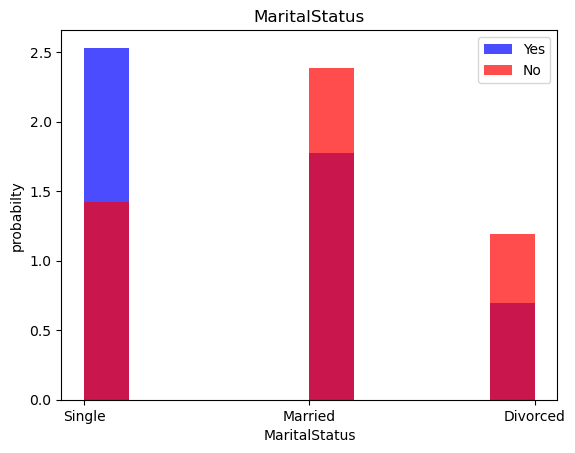

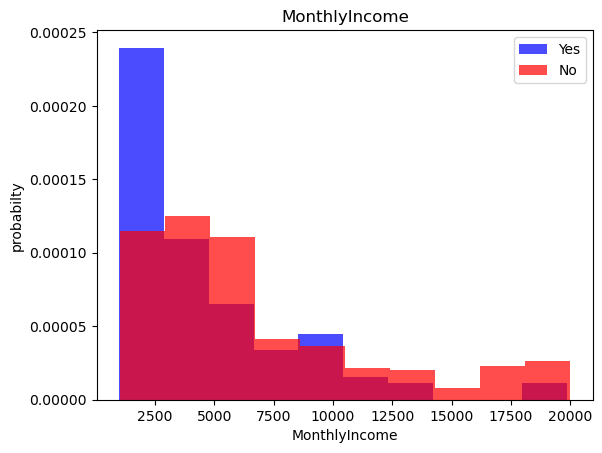

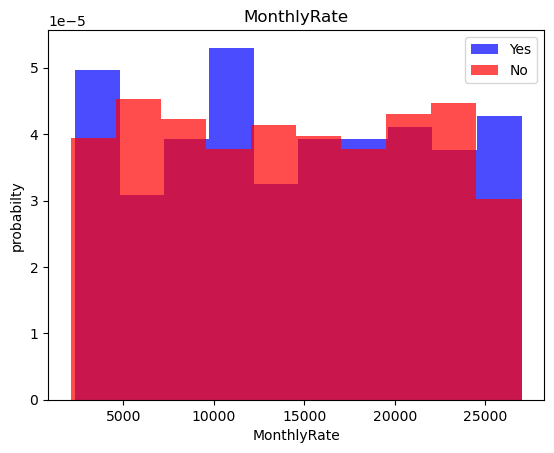

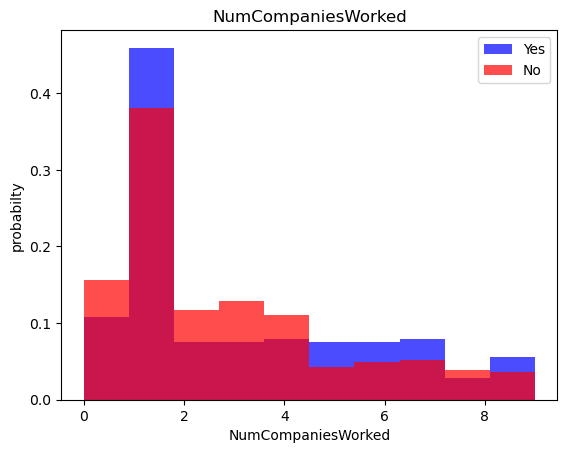

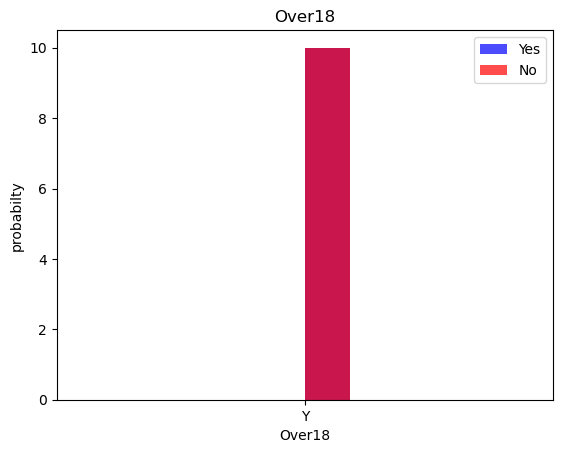

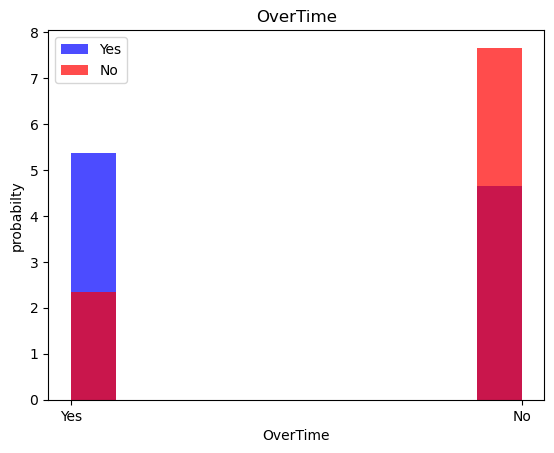

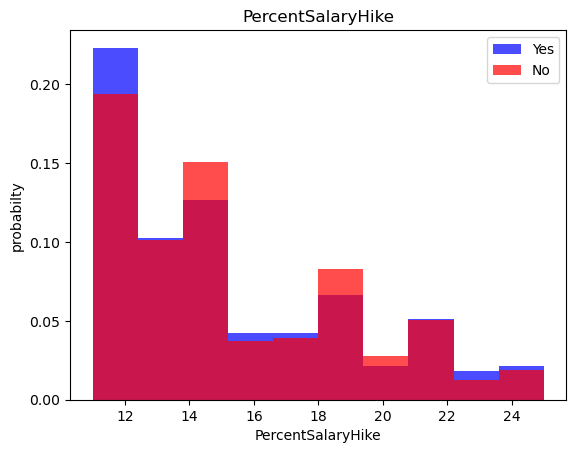

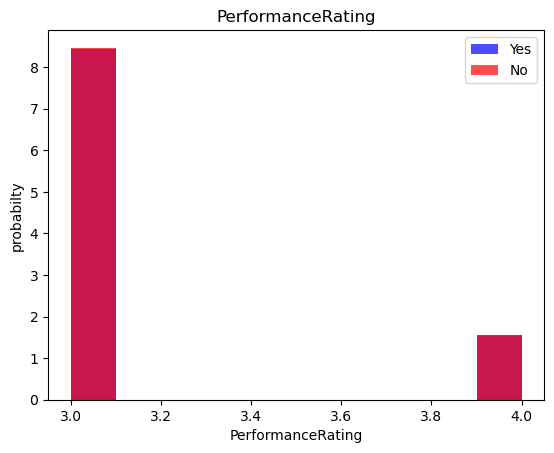

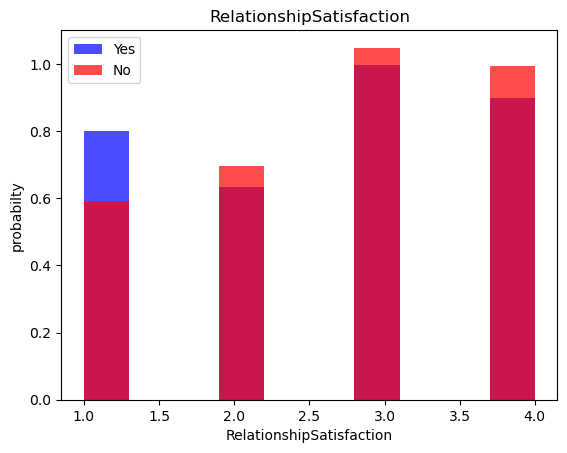

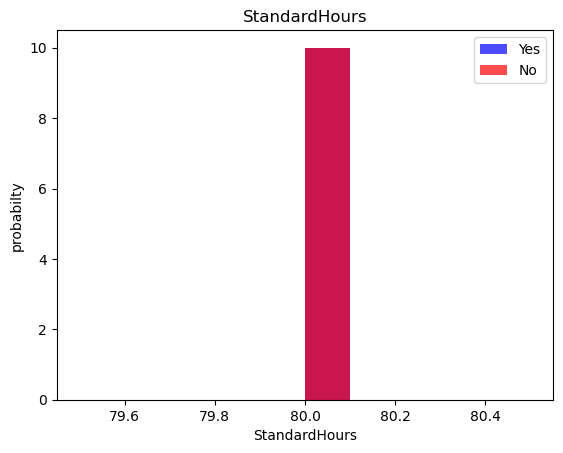

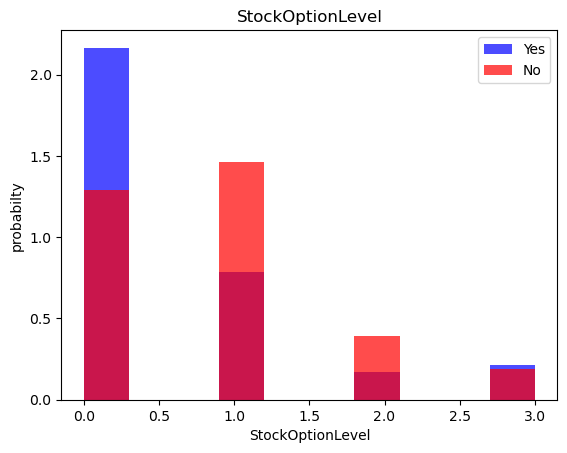

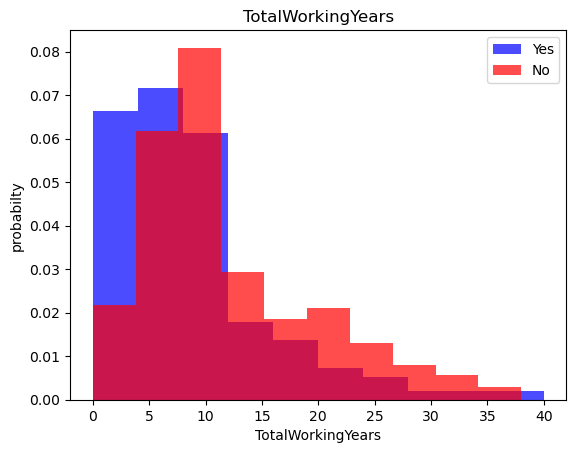

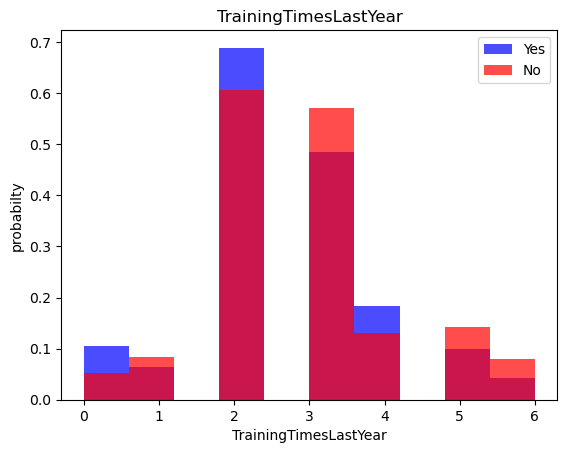

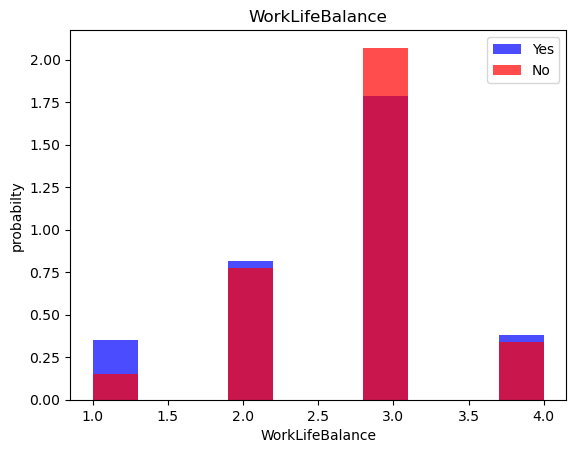

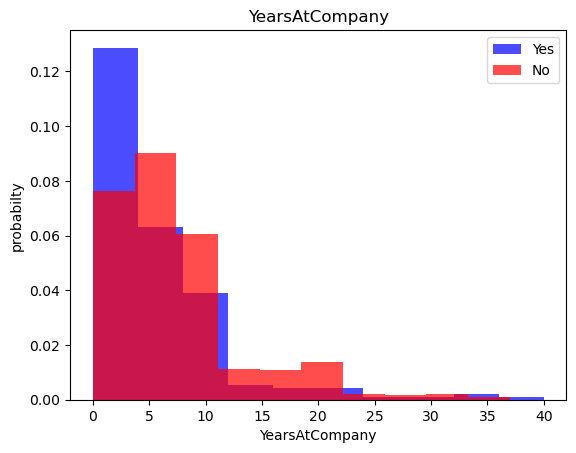

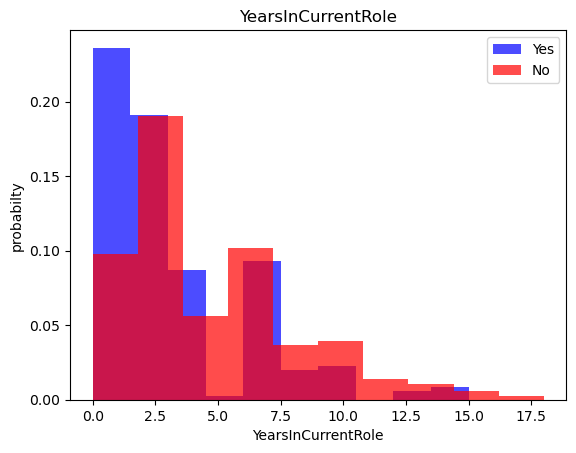

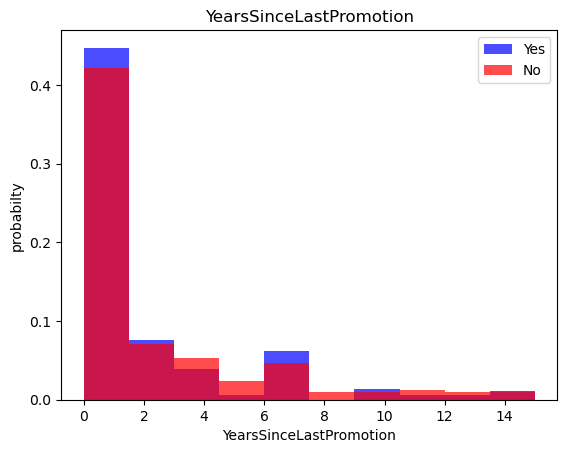

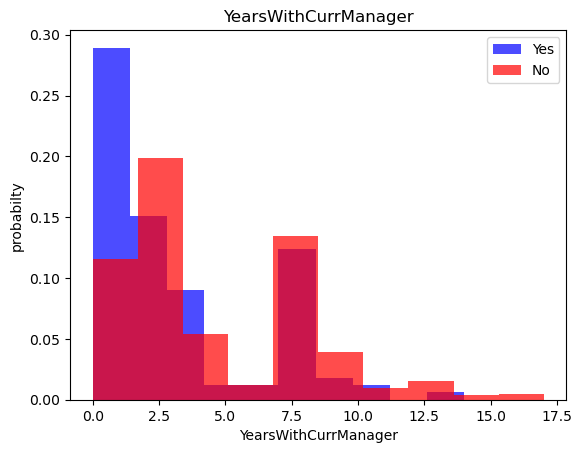

In [11]:
for label in df.drop("Attrition", axis=1):
    plt.hist(df[df['Attrition']=='Yes'][label], color='blue', label='Yes', alpha=0.7, density=True)
    plt.hist(df[df['Attrition']=="No"][label], color='red', label='No', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('probabilty')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Remove irrelevant features, encode data and split

In [4]:
# Drop irrelevant features
df = df.drop(['EmployeeCount', 'Over18', 'PerformanceRating', 'StandardHours'], axis=1)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PercentSalaryHike  RelationshipSatisfaction  \
0                        2  ...                11                         1   
1                        3  ...                23                         4   
2                        4  ...                15                         2   
3                        4  ...                11                         3   
4                        1  ...                12                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 31 columns]

In [6]:
# Identify features that needs converting to Int and the number of unique categories each of these features have 
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} => {df[col].unique()}  \nTotal number of unique features = {df[col].nunique()}\n\n")

Attrition => ['Yes' 'No']  
Total number of unique features = 2


BusinessTravel => ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']  
Total number of unique features = 3


Department => ['Sales' 'Research & Development' 'Human Resources']  
Total number of unique features = 3


EducationField => ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']  
Total number of unique features = 6


Gender => ['Female' 'Male']  
Total number of unique features = 2


JobRole => ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']  
Total number of unique features = 9


MaritalStatus => ['Single' 'Married' 'Divorced']  
Total number of unique features = 3


OverTime => ['Yes' 'No']  
Total number of unique features = 2




In [5]:
# Encode dataset using OneHotEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encode = LabelEncoder()
    df[column] = label_encode.fit_transform(df[column])
    label_encoders[column] = label_encode
    if df[column].nunique() > 2:
        encoder = OneHotEncoder(sparse_output=False, drop=None)
        encode_data = encoder.fit_transform(df[[column]])
        df_encoder = pd.DataFrame(encode_data, columns=[f"{column}_{cat}" for cat in encoder.categories_[0]])
        df = pd.concat([df, df_encoder], axis = 1).drop(column, axis=1)
df.head()

BusinessTravel [2 1 0]
Department [2 1 0]
EducationField [1 4 3 2 5 0]
JobRole [7 6 2 4 0 3 8 5 1]
MaritalStatus [2 1 0]


Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          1       1102                 1          2               1   
1   49          0        279                 8          1               2   
2   37          1       1373                 2          2               4   
3   33          0       1392                 3          4               5   
4   27          0        591                 2          1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   JobRole_2  JobRole_3  JobRole_4  JobRole_5  JobRole_6  JobRole_7  \
0        0.0        0.0        0.0        0.0        0.0        1.0   
1        0.0        0.0        0.0        0.0        1.0        0.0   
2        1.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        1.0        0.0   
4        1.0        0.0        0.0        0.0        0.0        0.0   

   JobRole_8  MaritalStatus_0  MaritalStatus_1  MaritalStatus_2  
0        0.0              0.0              0.0              1.0  
1        0.0              0.0              1.0              0.0  
2        0.0              0.0              0.0              1.0  
3        0.0              0.0              1.0              0.0  
4        0.0              0.0              1.0              0.0  

[5 rows x 50 columns]

In [6]:
# Confirm names of columns after encoding
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_0', 'BusinessTravel_1', 'BusinessTravel_2',
       'Department_0', 'Department_1', 'Department_2', 'EducationField_0',
       'EducationField_1', 'EducationField_2', 'EducationField_3',
       'EducationField_4', 'EducationField_5', 'JobRole_0', 'JobRole_1',
       'JobRole_2', 'JobRole_3', 'JobRole_4', 'JobRole_5', 'JobRole_6',
       'JobRole_7', 'JobRole_8', 'MaritalStatus_0', 'MaritalStatus_1',
       'MaritalStatus_2'],
      dtype='object')

In [7]:
# Pick one column at random to confirm encoding
df['BusinessTravel_0']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: BusinessTravel_0, Length: 1470, dtype: float64

In [8]:
# Split data into training = 60%, validating = 20% and testing = 20%
train, validate, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\HELLO\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
# A function that scale the dataset and handles data imbalance caused by oversampling in the training set
def scale_dataset(dataframe, oversample=False):
     x = dataframe.drop('Attrition', axis=1).values
     y = dataframe["Attrition"].values
     
     scaler = StandardScaler()
     x = scaler.fit_transform(x)

     if oversample:
         ros = RandomOverSampler()
         x,y = ros.fit_resample(x, y)
     data = np.hstack((x, np.reshape(y, (-1, 1))))
     
     return data, x, y


In [10]:
# Check to see data imbalance in the training set
print(sum(train['Attrition']==0))
print(sum(train['Attrition']==1))

737
145


In [11]:
# using the scale function Scale the training, validating and testing datasets and resolve data imbalance in the training dataset
train, xtrain, ytrain = scale_dataset(train, oversample=True)
validate, xvalidate, yvalidate = scale_dataset(validate)
test, xtest, ytest = scale_dataset(test)

In [12]:
# Confirm if scaling was properly done
print(sum(ytrain==0))
print(sum(ytrain==1))
print(sum(ytest==0))
print(sum(ytest==1))
print(sum(yvalidate==0))
print(sum(yvalidate==1))

737
737
247
47
249
45


# K-Nearest Neighbors Model

In [13]:
# Initialize and train the model
knm_model = KNeighborsClassifier(n_neighbors=4, p=3)
knm_model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4, p=3)

In [393]:
# Validate and test the model
knm_valid = knm_model.predict(xvalidate)
knm_pred = knm_model.predict(xtest)

* K-Nearest Neighbors Metrics

In [394]:
print('\n                  Validation Classification Report\n\n',classification_report(yvalidate, knm_valid))


                  Validation Classification Report

               precision    recall  f1-score   support

           0       0.88      0.81      0.85       249
           1       0.28      0.40      0.33        45

    accuracy                           0.75       294
   macro avg       0.58      0.61      0.59       294
weighted avg       0.79      0.75      0.77       294



In [395]:
print('\n                  Testing Classification Report\n\n',classification_report(ytest, knm_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.89      0.83      0.86       247
           1       0.33      0.45      0.38        47

    accuracy                           0.77       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.80      0.77      0.78       294



In [396]:
# compute the classification report manually to confirm model performance
knm_conf_metrix = confusion_matrix(ytest, knm_pred)

TP = knm_conf_metrix[1,1]
TN = knm_conf_metrix[0,0]
FP = knm_conf_metrix[0,1]
FN = knm_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.7687074829931972 
Precision: 0.3333333333333333 
Recall 0.44680851063829785 
F1-Score 0.3818181818181818 



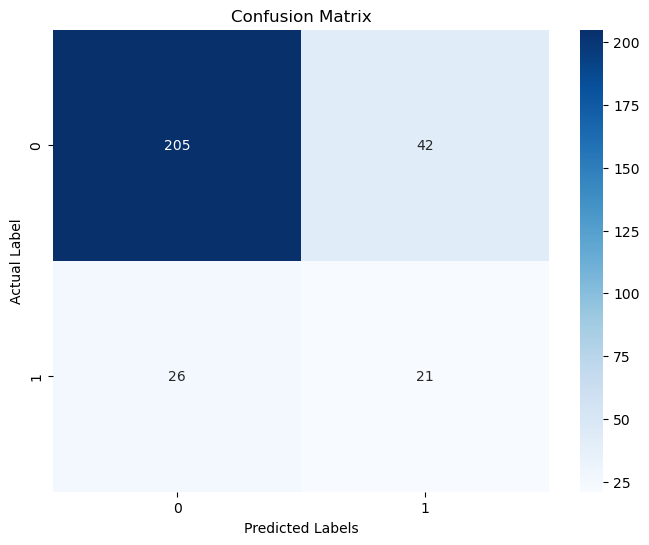

In [397]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(knm_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

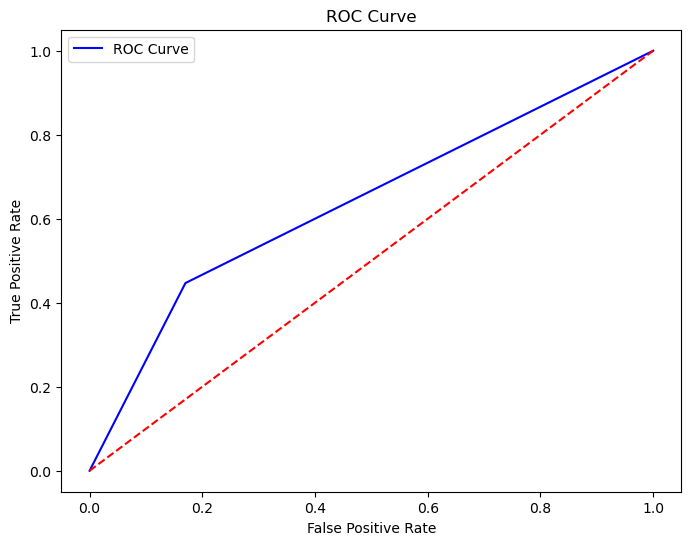

AUC 0.6383840124041691


In [398]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
knm_fpr, knm_tpr, knm_thresholds = roc_curve(ytest, knm_pred)

plt.figure(figsize=(8, 6))
plt.plot(knm_fpr, knm_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, knm_pred))

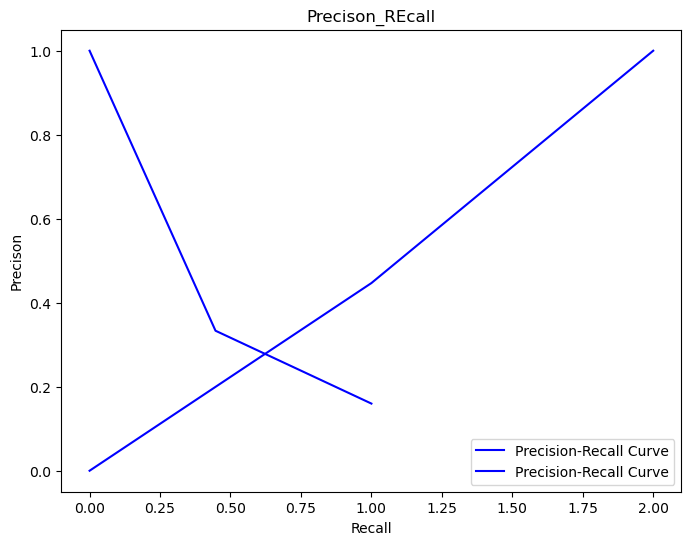

In [399]:
# Plots Precision vs Recall at different thresholds
knm_precision, knm_recall, knm_thresholds = precision_recall_curve(ytest, knm_pred)

plt.figure(figsize=(8, 6))
plt.plot(knm_recall, knm_precision, knm_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [272]:
# feature_importances = knm_model.feature_importances_
# feature_names = xtrain

# plt.figure(figsize=(8, 6))
# plt.barh(feature_names, feature_importances)
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Names')
# plt.title('Feature Importance')
# plt.legend()
# plt.show()

In [295]:
# x_min, x_max = xtrain[:,0].min(), xtrain[:,0].max()
# y_min, y_max = xtrain[:,1].min(), xtrain[:,1].max()
# xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
# z = knm_model.predict(np.c_[xx.ravel(), yy.ravel()])

In [572]:
knm_scores = knm_model.score(xtest, ytest)
print(knm_scores)

0.7687074829931972


In [385]:
# Classification Error
knm_accuracy = accuracy_score(ytest, knm_pred)
print('Classification Error (Accuracy):', 1 - knm_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
knm_mse = mean_squared_error(ytest, knm_pred)
print("Mean Square Error (MSE):", knm_mse)

# Cross-Entropy Loss (Log loss)
knm_log_loss_value = log_loss(ytest, knm_pred)
print("Cross-Entropy(Log Loss):", knm_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
knm_precision, knm_recall, _ = precision_recall_curve(ytest, knm_pred)
knm_auc_pr = auc(knm_recall, knm_precision)
print('AUC-PR', knm_auc_pr)

Classification Error (Accuracy): 0.23129251700680276
Mean Square Error (MSE): 0.23129251700680273
Cross-Entropy(Log Loss): 8.33662731448968
AUC-PR 0.43428860906064554


# Support Vector Classifier Model

In [594]:
svm_model = SVC(probability=True, kernel='rbf', random_state=42)

In [595]:
svm_model = svm_model.fit(xtrain, ytrain)

In [596]:
svm_valid = svm_model.predict(xvalidate)
svm_pred = svm_model.predict(xtest)

* Support Vector Classifier Metrics

In [597]:
print('\n                  Validation Classification Report\n\n', classification_report(yvalidate, svm_valid))


                  Validation Classification Report

               precision    recall  f1-score   support

           0       0.90      0.89      0.90       249
           1       0.44      0.47      0.45        45

    accuracy                           0.83       294
   macro avg       0.67      0.68      0.67       294
weighted avg       0.83      0.83      0.83       294



In [600]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, svm_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.91      0.94      0.92       247
           1       0.62      0.51      0.56        47

    accuracy                           0.87       294
   macro avg       0.76      0.72      0.74       294
weighted avg       0.86      0.87      0.87       294



In [380]:
# compute the classification report manually to confirm model performance
svm_conf_metrix = confusion_matrix(ytest, svm_pred)

TP = svm_conf_metrix[1,1]
TN = svm_conf_metrix[0,0]
FP = svm_conf_metrix[0,1]
FN = svm_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.8707482993197279 
Precision: 0.6153846153846154 
Recall 0.5106382978723404 
F1-Score 0.558139534883721 



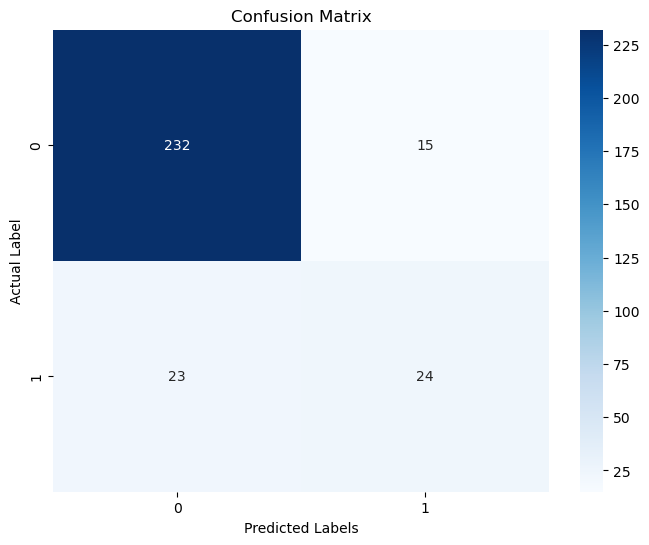

In [381]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(svm_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

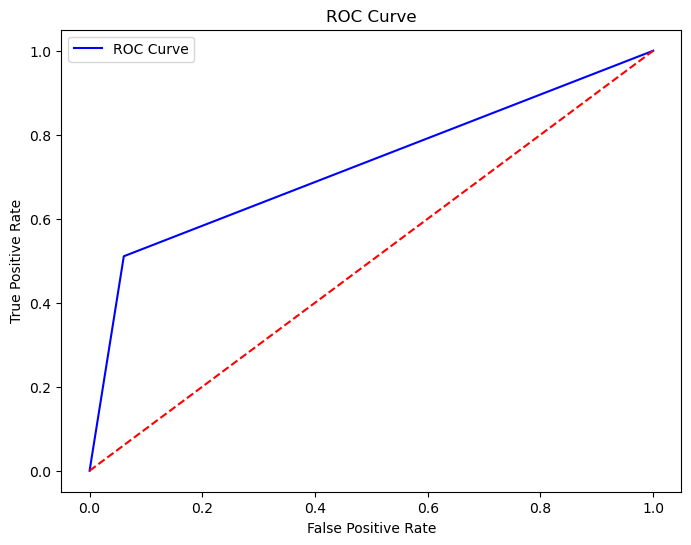

AUC 0.7249547764665345


In [382]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
svm_fpr, svm_tpr, svm_thresholds = roc_curve(ytest, svm_pred)

plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, svm_pred))

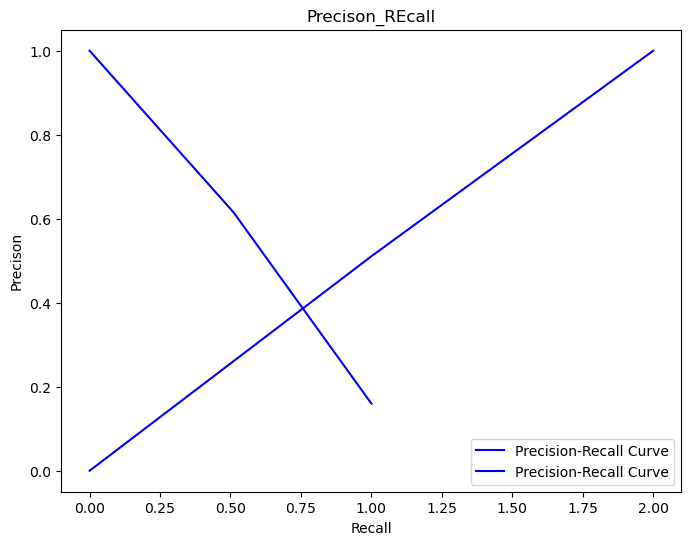

In [383]:
# Plots Precision vs Recall at different thresholds
svm_precision, svm_recall, svm_thresholds = precision_recall_curve(ytest, svm_pred)

plt.figure(figsize=(8, 6))
plt.plot(svm_recall, svm_precision, svm_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [568]:
svm_scores = svm_model.score(xtest, ytest)
print(svm_scores)

0.8707482993197279


In [384]:
# Classification Error
svm_accuracy = accuracy_score(ytest, svm_pred)
print('Classification Error (Accuracy):', 1 - svm_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
svm_mse = mean_squared_error(ytest, svm_pred)
print("Mean Square Error (MSE):", svm_mse)

# Cross-Entropy Loss (Log loss)
svm_log_loss_value = log_loss(ytest, svm_pred)
print("Cross-Entropy(Log Loss):", svm_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
svm_precision, svm_recall, _ = precision_recall_curve(ytest, svm_pred)
svm_auc_pr = auc(svm_recall, svm_precision)
print('AUC-PR', svm_auc_pr)

Classification Error (Accuracy): 0.12925170068027214
Mean Square Error (MSE): 0.1292517006802721
Cross-Entropy(Log Loss): 4.6587034992736465
AUC-PR 0.6021271028869813


# Naive Bayes

In [23]:
nb_model = GaussianNB()
nb_model = nb_model.fit(xtrain, ytrain)

In [367]:
nb_valid = nb_model.predict(xvalidate)

In [368]:
nb_pred = nb_model.predict(xtest)

In [369]:
print('\n                  Validation Classification Report\n\n',classification_report(yvalidate, nb_valid))


                  Validation Classification Report

               precision    recall  f1-score   support

           0       0.93      0.57      0.71       249
           1       0.24      0.76      0.37        45

    accuracy                           0.60       294
   macro avg       0.58      0.66      0.54       294
weighted avg       0.82      0.60      0.65       294



In [370]:
print('\n                  Testing Classification Report\n\n',classification_report(ytest, nb_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.93      0.58      0.72       247
           1       0.26      0.77      0.39        47

    accuracy                           0.61       294
   macro avg       0.59      0.67      0.55       294
weighted avg       0.82      0.61      0.66       294



In [371]:
# compute the classification report manually to confirm model performance
nb_conf_metrix = confusion_matrix(ytest, nb_pred)

TP = nb_conf_metrix[1,1]
TN = nb_conf_metrix[0,0]
FP = nb_conf_metrix[0,1]
FN = nb_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.6122448979591837 
Precision: 0.2589928057553957 
Recall 0.7659574468085106 
F1-Score 0.38709677419354843 



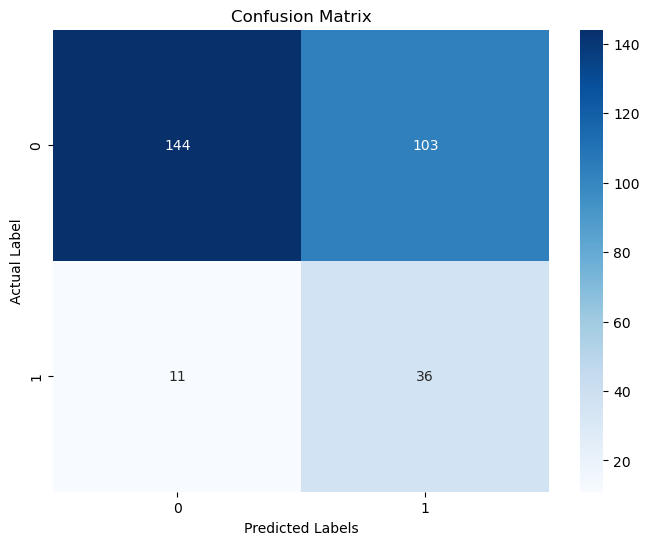

In [372]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(nb_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

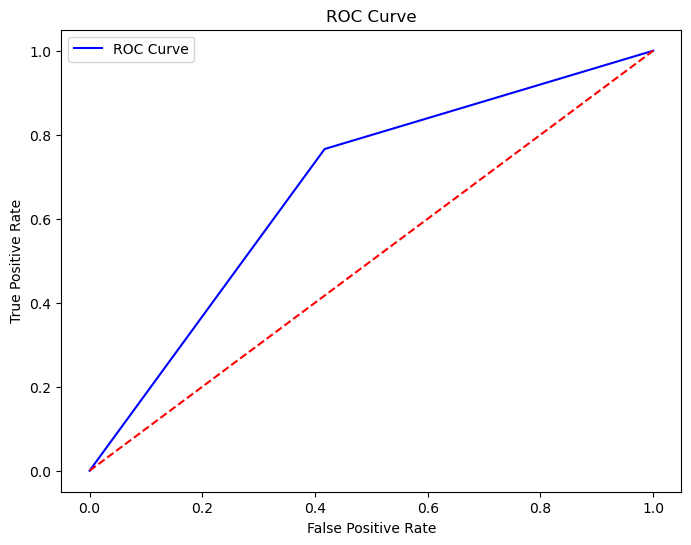

AUC 0.7249547764665345


In [373]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
nb_fpr, nb_tpr, nb_thresholds = roc_curve(ytest, nb_pred)

plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, y_pred))

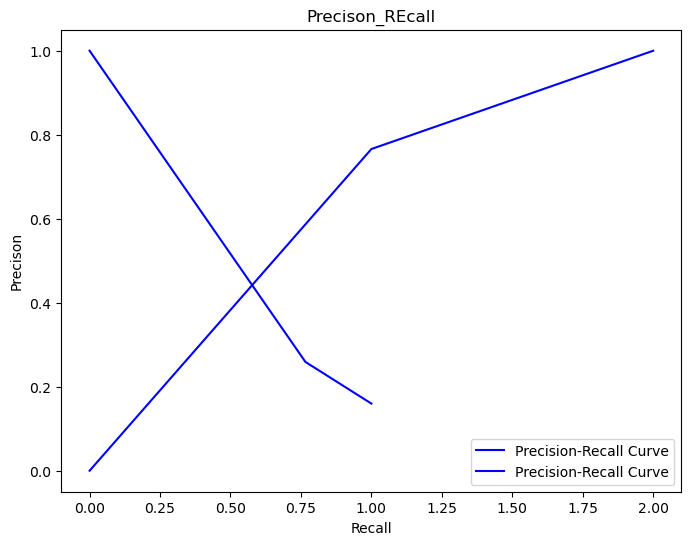

In [374]:
# Plots Precision vs Recall at different thresholds
nb_precision, nb_recall, nb_thresholds = precision_recall_curve(ytest, nb_pred)

plt.figure(figsize=(8, 6))
plt.plot(nb_recall, nb_precision, nb_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [375]:
# Classification Error
nb_accuracy = accuracy_score(ytest, nb_pred)
print('Classification Error (Accuracy):', 1 - nb_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
nb_mse = mean_squared_error(ytest, nb_pred)
print("Mean Square Error (MSE):", nb_mse)

# Cross-Entropy Loss (Log loss)
nb_log_loss_value = log_loss(ytest, nb_pred)
print("Cross-Entropy(Log Loss):", nb_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
nb_precision, nb_recall, _ = precision_recall_curve(ytest, nb_pred)
nb_auc_pr = auc(nb_recall, nb_precision)
print('AUC-PR', nb_auc_pr)

Classification Error (Accuracy): 0.3877551020408163
Mean Square Error (MSE): 0.3877551020408163
Cross-Entropy(Log Loss): 13.976110497820937
AUC-PR 0.5311826092751504


In [575]:
nb_scores = nb_model.score(xtest, ytest)
print(nb_scores)

0.6122448979591837


# Logistic Regression

In [29]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(xtrain, ytrain)

In [353]:
lg_pred = lg_model.predict(xtest)

In [30]:
lg_valid = lg_model.predict(xvalidate)

In [613]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, lg_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.94      0.71      0.81       247
           1       0.33      0.74      0.45        47

    accuracy                           0.71       294
   macro avg       0.63      0.73      0.63       294
weighted avg       0.84      0.71      0.75       294



In [354]:
print('\n                  Validate Classification Report\n\n', classification_report(yvalidate, lg_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.90      0.89      0.90       249
           1       0.44      0.47      0.45        45

    accuracy                           0.83       294
   macro avg       0.67      0.68      0.67       294
weighted avg       0.83      0.83      0.83       294



In [614]:
# compute the classification report manually to confirm model performance
lg_conf_metrix = confusion_matrix(ytest, lg_pred)

TP = lg_conf_metrix[1,1]
TN = lg_conf_metrix[0,0]
FP = lg_conf_metrix[0,1]
FN = lg_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.7142857142857143 
Precision: 0.32710280373831774 
Recall 0.7446808510638298 
F1-Score 0.4545454545454545 



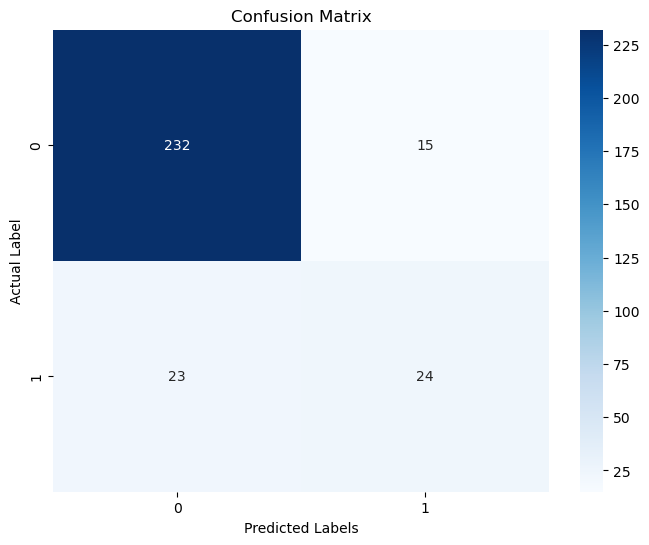

In [352]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(lg_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

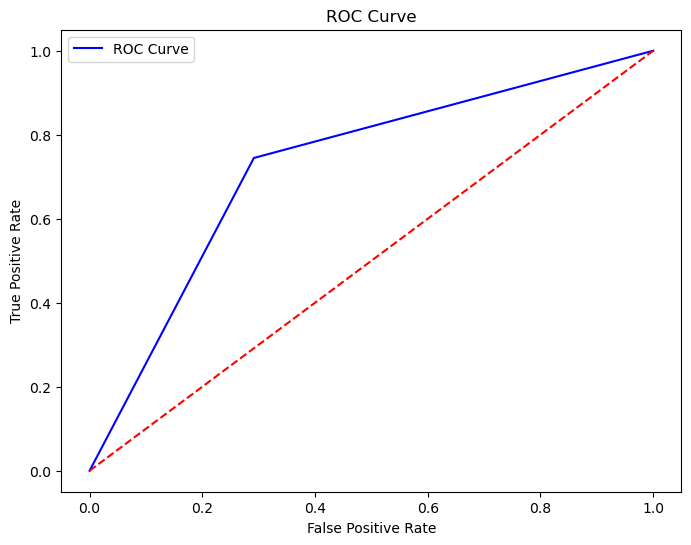

AUC 0.7265914376776639


In [357]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
lg_fpr, lg_tpr, lg_thresholds = roc_curve(ytest, lg_pred)

plt.figure(figsize=(8, 6))
plt.plot(lg_fpr, lg_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, lg_pred))

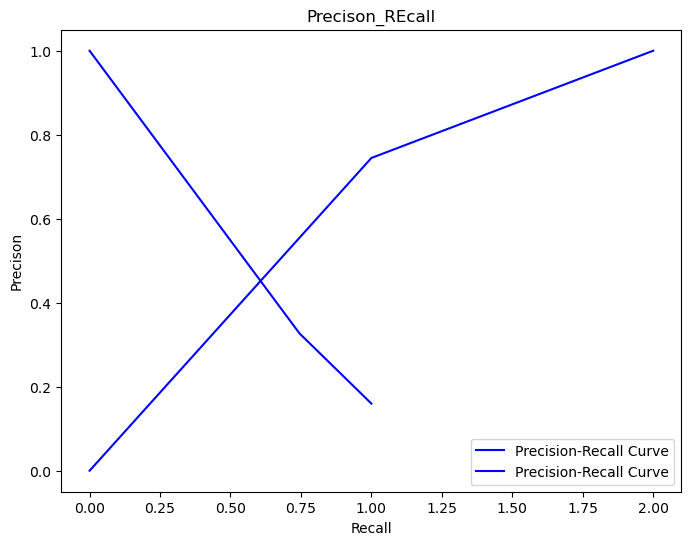

In [358]:
# Plots Precision vs Recall at different thresholds
lg_precision, lg_recall, lg_thresholds = precision_recall_curve(ytest, lg_pred)

plt.figure(figsize=(8, 6))
plt.plot(lg_recall, lg_precision, lg_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [359]:
# Classification Error
lg_accuracy = accuracy_score(ytest, lg_pred)
print('Classification Error (Accuracy):', 1 - lg_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
lg_mse = mean_squared_error(ytest, lg_pred)
print("Mean Square Error (MSE):", lg_mse)

# Cross-Entropy Loss (Log loss)
lg_log_loss_value = log_loss(ytest, lg_pred)
print("Cross-Entropy(Log Loss):", lg_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
lg_precision, lg_recall, _ = precision_recall_curve(ytest, y_pred)
lg_auc_pr = auc(lg_recall, lg_precision)
print('AUC-PR', lg_auc_pr)

Classification Error (Accuracy): 0.2857142857142857
Mean Square Error (MSE): 0.2857142857142857
Cross-Entropy(Log Loss): 10.2981866826049
AUC-PR 0.6021271028869813


In [570]:
lg_scores = lg_model.score(xtest, ytest)
print(lg_scores)

0.7142857142857143


# Stacking Classifier

In [34]:
# define base models
svc_model = SVC(probability=True, kernel='linear', random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, learning_rate='adaptive', learning_rate_init=0.01, alpha=0.001, random_state=42)

In [35]:
svc_model.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True, random_state=42)

In [37]:
svc_valid = svc_model.predict(xvalidate)

In [38]:
svc_pred = svc_model.predict(xtest)

In [400]:
print('\n                  Validate Classification Report\n\n', classification_report(yvalidate, svc_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.96      0.76      0.85       249
           1       0.38      0.84      0.53        45

    accuracy                           0.77       294
   macro avg       0.67      0.80      0.69       294
weighted avg       0.88      0.77      0.80       294



In [401]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, svc_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.94      0.72      0.81       247
           1       0.34      0.74      0.46        47

    accuracy                           0.72       294
   macro avg       0.64      0.73      0.64       294
weighted avg       0.84      0.72      0.76       294



In [402]:
nn_model.fit(xtrain, ytrain)
# nn_pred

MLPClassifier(alpha=0.001, learning_rate='adaptive', learning_rate_init=0.01,
              max_iter=500, random_state=42)

In [403]:
nn_valid = nn_model.predict(xvalidate)

In [404]:
nn_pred = nn_model.predict(xtest)

In [407]:
print('\n                  Validate Classification Report\n\n', classification_report( yvalidate, nn_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.90      0.91      0.90       249
           1       0.47      0.44      0.45        45

    accuracy                           0.84       294
   macro avg       0.68      0.68      0.68       294
weighted avg       0.83      0.84      0.84       294



In [409]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, nn_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.89      0.91      0.90       247
           1       0.46      0.38      0.42        47

    accuracy                           0.83       294
   macro avg       0.67      0.65      0.66       294
weighted avg       0.82      0.83      0.82       294



In [161]:
# define stacking model
base_learners = [
    ('svc', svc_model),
    ('nn', nn_model)
]

In [162]:
# Logistic Regression as the meta-learner
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    passthrough=True
)

In [164]:
stacking_model.fit(xtrain, ytrain)

StackingClassifier(estimators=[('svc',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('nn',
                                MLPClassifier(alpha=0.001,
                                              learning_rate='adaptive',
                                              learning_rate_init=0.01,
                                              max_iter=500, random_state=42))],
                   final_estimator=LogisticRegression(), passthrough=True)

In [410]:
stack_valid = stacking_model.predict(xvalidate)

In [411]:
stack_pred = stacking_model.predict(xtest)

In [412]:
print('\n                  Validate Classification Report\n\n', classification_report(yvalidate, stack_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.89      0.95      0.92       249
           1       0.55      0.36      0.43        45

    accuracy                           0.86       294
   macro avg       0.72      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [413]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, stack_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.88      0.93      0.91       247
           1       0.50      0.36      0.42        47

    accuracy                           0.84       294
   macro avg       0.69      0.65      0.66       294
weighted avg       0.82      0.84      0.83       294



In [414]:
# compute the classification report manually to confirm model performance
stack_conf_metrix = confusion_matrix(ytest, stack_pred)

TP = stack_conf_metrix[1,1]
TN = stack_conf_metrix[0,0]
FP = stack_conf_metrix[0,1]
FN = stack_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.8401360544217688 
Precision: 0.5 
Recall 0.3617021276595745 
F1-Score 0.4197530864197531 



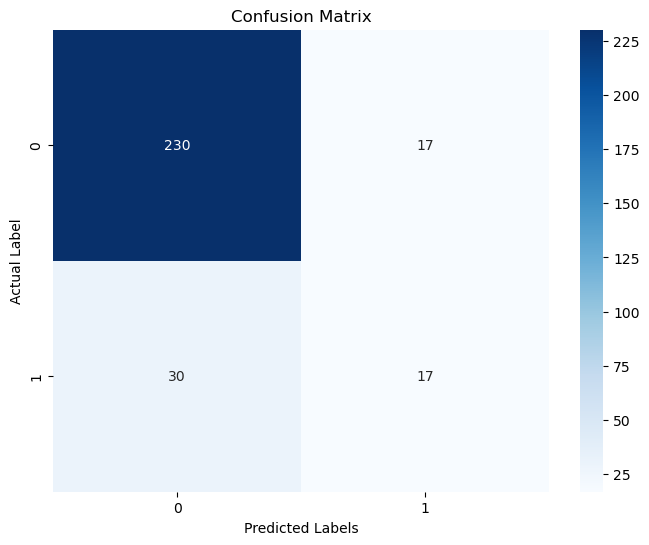

In [415]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(stack_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

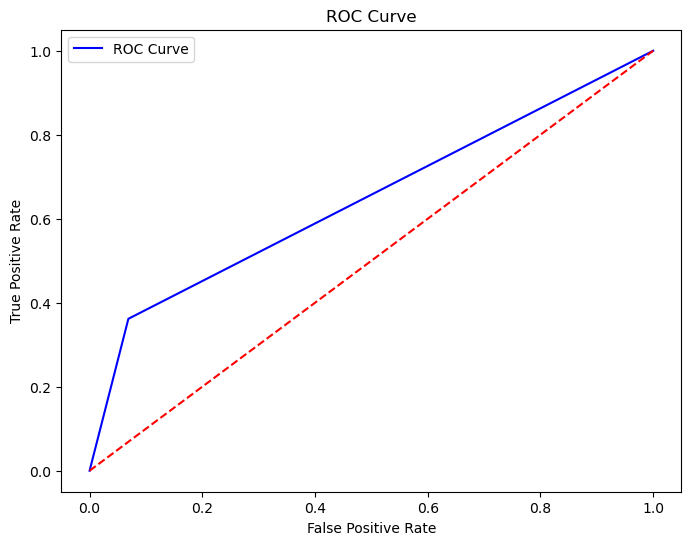

AUC 0.6464381083642002


In [416]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
stack_fpr, stack_tpr, stack_thresholds = roc_curve(ytest, stack_pred)

plt.figure(figsize=(8, 6))
plt.plot(stack_fpr, stack_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, stack_pred))

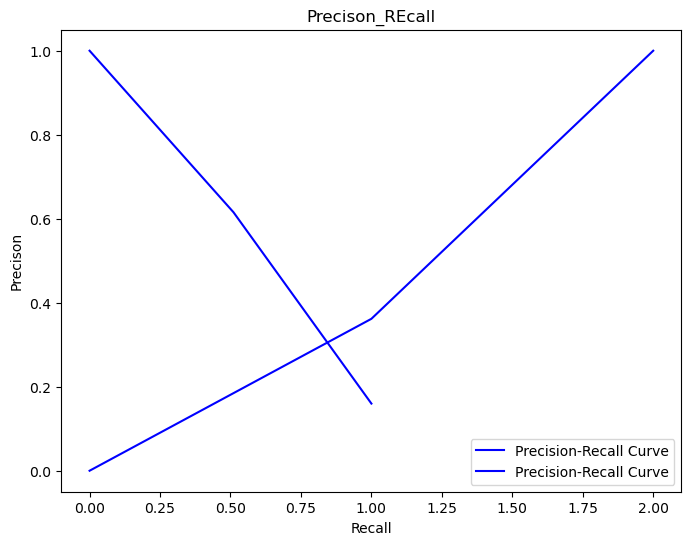

In [417]:
# Plots Precision vs Recall at different thresholds
stack_precision, stack_recall, stack_thresholds = precision_recall_curve(ytest, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(stack_recall, stack_precision, stack_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [418]:
# Classification Error
stack_accuracy = accuracy_score(ytest, stack_pred)
print('Classification Error (Accuracy):', 1 - stack_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
stack_mse = mean_squared_error(ytest, stack_pred)
print("Mean Square Error (MSE):", stack_mse)

# Cross-Entropy Loss (Log loss)
stack_log_loss_value = log_loss(ytest, stack_pred)
print("Cross-Entropy(Log Loss):", stack_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
stack_precision, stack_recall, _ = precision_recall_curve(ytest, stack_pred)
stack_auc_pr = auc(stack_recall, stack_precision)
print('AUC-PR', stack_auc_pr)

Classification Error (Accuracy): 0.15986394557823125
Mean Square Error (MSE): 0.1598639455782313
Cross-Entropy(Log Loss): 5.762080643838456
AUC-PR 0.4818714719930526


In [557]:
stack_scores = stacking_model.score(xtest, ytest)
print(stack_scores)

0.8401360544217688


# AdaBoost Classifier

In [169]:
weak_learner = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='gini')

In [170]:
ada_model = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)

In [172]:
ada_model.fit(xtrain, ytrain)

C:\Users\HELLO\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.8, n_estimators=100, random_state=42)

In [420]:
ada_valid = ada_model.predict(xvalidate)

In [421]:
ada_pred = ada_model.predict(xtest)

In [422]:
print('\n                  Validate Classification Report\n\n', classification_report(yvalidate, ada_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.93      0.84      0.88       249
           1       0.43      0.64      0.51        45

    accuracy                           0.81       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.85      0.81      0.83       294



In [423]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, ada_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.95      0.84      0.89       247
           1       0.48      0.79      0.60        47

    accuracy                           0.83       294
   macro avg       0.72      0.81      0.74       294
weighted avg       0.88      0.83      0.85       294



In [424]:
# compute the classification report manually to confirm model performance
ada_conf_metrix = confusion_matrix(ytest, ada_pred)

TP = ada_conf_metrix[1,1]
TN = ada_conf_metrix[0,0]
FP = ada_conf_metrix[0,1]
FN = ada_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.8299319727891157 
Precision: 0.4805194805194805 
Recall 0.7872340425531915 
F1-Score 0.5967741935483871 



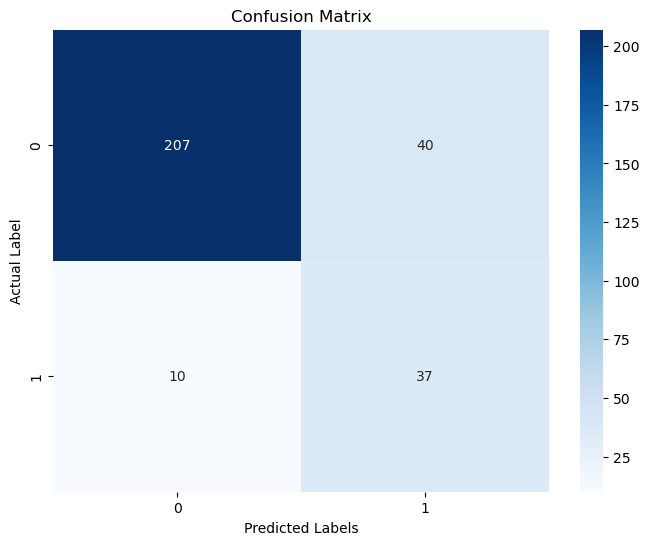

In [425]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(ada_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

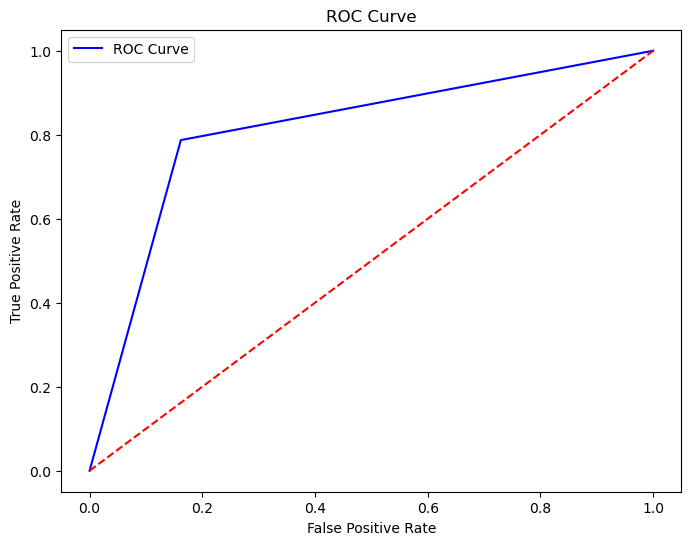

AUC 0.8126453613575674


In [426]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
ada_fpr, ada_tpr, ada_thresholds = roc_curve(ytest, ada_pred)

plt.figure(figsize=(8, 6))
plt.plot(ada_fpr, ada_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, ada_pred))

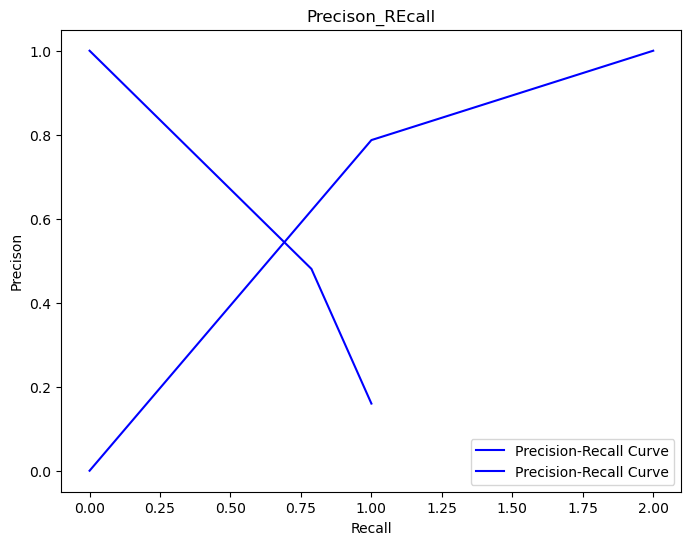

In [427]:
# Plots Precision vs Recall at different thresholds
ada_precision, ada_recall, ada_thresholds = precision_recall_curve(ytest, ada_pred)

plt.figure(figsize=(8, 6))
plt.plot(ada_recall, ada_precision, ada_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [428]:
# Classification Error
ada_accuracy = accuracy_score(ytest, ada_pred)
print('Classification Error (Accuracy):', 1 - ada_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
ada_mse = mean_squared_error(ytest, ada_pred)
print("Mean Square Error (MSE):", ada_mse)

# Cross-Entropy Loss (Log loss)
ada_log_loss_value = log_loss(ytest, ada_pred)
print("Cross-Entropy(Log Loss):", ada_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
ada_precision, ada_recall, _ = precision_recall_curve(ytest, ada_pred)
ada_auc_pr = auc(ada_recall, ada_precision)
print('AUC-PR', ada_auc_pr)

Classification Error (Accuracy): 0.17006802721088432
Mean Square Error (MSE): 0.17006802721088435
Cross-Entropy(Log Loss): 6.12987302536006
AUC-PR 0.6508835642574246


In [556]:
ada_scores = ada_model.score(xtest, ytest)
print(ada_scores)

0.8299319727891157


# Random Forest Model

In [177]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [439]:
rf_valid = rf_model.predict(xvalidate)

In [440]:
rf_pred = rf_model.predict(xtest)

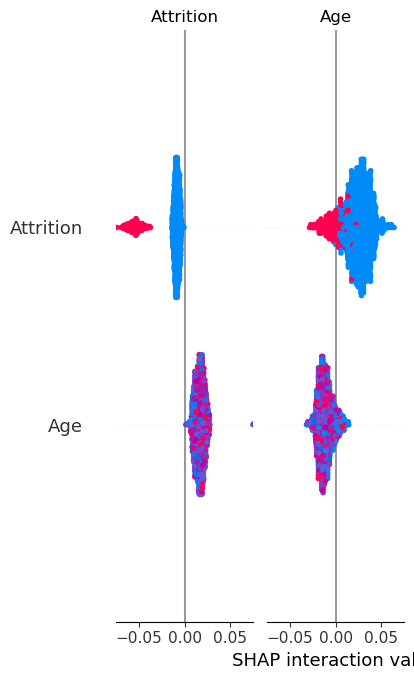

In [611]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(df.drop('JobSatisfaction', axis=1))
shap.summary_plot(shap_values, df.drop('JobSatisfaction', axis=1))

In [441]:
print('\n                  Validate Classification Report\n\n', classification_report(yvalidate, rf_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.89      0.98      0.93       249
           1       0.74      0.31      0.44        45

    accuracy                           0.88       294
   macro avg       0.81      0.65      0.68       294
weighted avg       0.86      0.88      0.86       294



In [442]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, rf_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.71      0.21      0.33        47

    accuracy                           0.86       294
   macro avg       0.79      0.60      0.63       294
weighted avg       0.84      0.86      0.83       294



In [443]:
# compute the classification report manually to confirm model performance
rf_conf_metrix = confusion_matrix(ytest, rf_pred)

TP = rf_conf_metrix[1,1]
TN = rf_conf_metrix[0,0]
FP = rf_conf_metrix[0,1]
FN = rf_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.8605442176870748 
Precision: 0.7142857142857143 
Recall 0.2127659574468085 
F1-Score 0.32786885245901637 



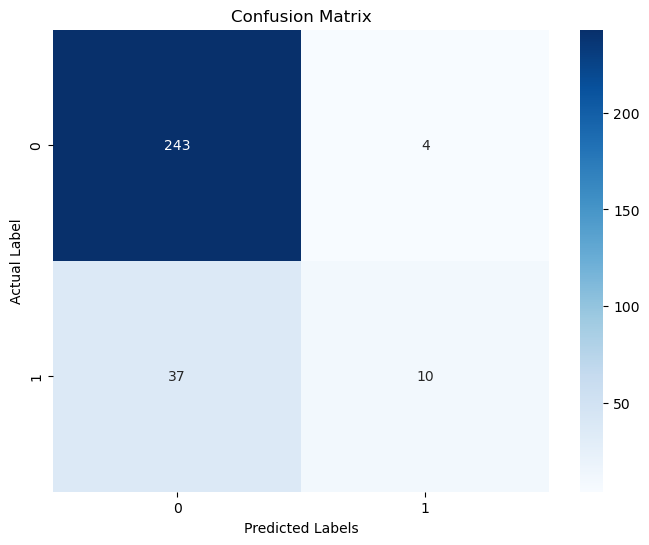

In [444]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(rf_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

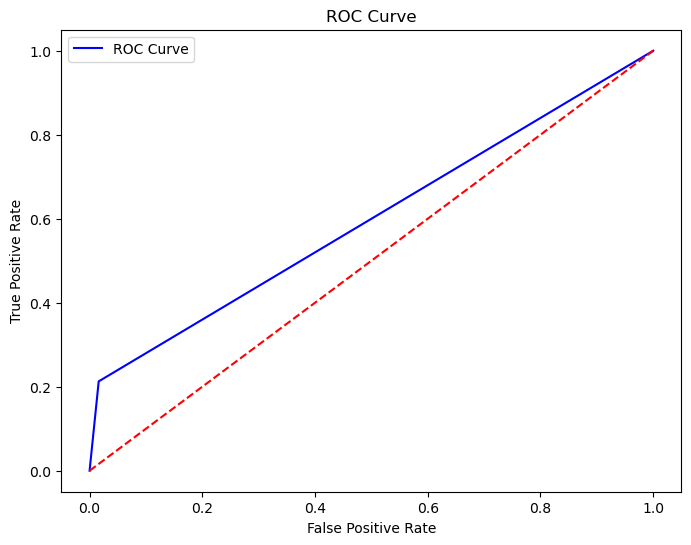

AUC 0.5982858127315014


In [445]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
rf_fpr, rf_tpr, rf_thresholds = roc_curve(ytest, rf_pred)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, rf_pred))

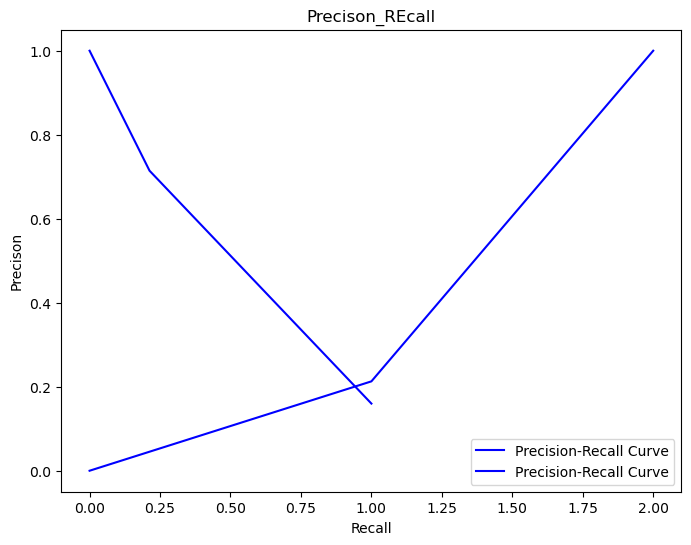

In [446]:
# Plots Precision vs Recall at different thresholds
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(ytest, rf_pred)

plt.figure(figsize=(8, 6))
plt.plot(rf_recall, rf_precision, rf_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [447]:
# Classification Error
rf_accuracy = accuracy_score(ytest, rf_pred)
print('Classification Error (Accuracy):', 1 - rf_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
rf_mse = mean_squared_error(ytest, rf_pred)
print("Mean Square Error (MSE):", rf_mse)

# Cross-Entropy Loss (Log loss)
rf_log_loss_value = log_loss(ytest, rf_pred)
print("Cross-Entropy(Log Loss):", rf_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
rf_precision, rf_recall, _ = precision_recall_curve(ytest, rf_pred)
rf_auc_pr = auc(rf_recall, rf_precision)
print('AUC-PR', rf_auc_pr)

Classification Error (Accuracy): 0.1394557823129252
Mean Square Error (MSE): 0.13945578231292516
Cross-Entropy(Log Loss): 5.026495880795249
AUC-PR 0.5264510059342886


In [554]:
rf_scores = rf_model.score(xtest, ytest)
print(rf_scores)

0.8605442176870748


# Cat Boost Classifier

In [182]:
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [0, 1, 2],
}

In [185]:
catboost_model = CatBoostClassifier(
    class_weights=[1, 7],
    random_state=42,
    verbose=0,
    iterations=1000,
    # learning_rate=1,
    # depth=5,
    # l2_leaf_reg=3,
    # cat_features=cat_features,
    # eval_matric='f1'
)

catboost_model.fit(xtrain, ytrain)

In [186]:
grid_search = RandomizedSearchCV(catboost_model, param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=1)

In [187]:
grid_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000022F4D8016A0>,
                   n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.0, 0.5, 1.0],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'random_strength': [0, 1, 2]},
                   scoring='f1', verbose=1)

In [188]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'random_strength': 2, 'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 10, 'bagging_temperature': 0.0}


In [449]:
cat_valid = grid_search.predict(xvalidate)

In [450]:
cat_pred = grid_search.predict(xtest)

In [452]:
print('\n                  Validate Classification Report\n\n', classification_report( yvalidate, cat_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.91      0.87      0.89       249
           1       0.42      0.51      0.46        45

    accuracy                           0.82       294
   macro avg       0.66      0.69      0.67       294
weighted avg       0.83      0.82      0.82       294



In [453]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, y_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.91      0.94      0.92       247
           1       0.62      0.51      0.56        47

    accuracy                           0.87       294
   macro avg       0.76      0.72      0.74       294
weighted avg       0.86      0.87      0.87       294



In [454]:
# compute the classification report manually to confirm model performance
cat_conf_metrix = confusion_matrix(ytest, cat_pred)

TP = cat_conf_metrix[1,1]
TN = cat_conf_metrix[0,0]
FP = cat_conf_metrix[0,1]
FN = cat_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.8435374149659864 
Precision: 0.5161290322580645 
Recall 0.3404255319148936 
F1-Score 0.41025641025641024 



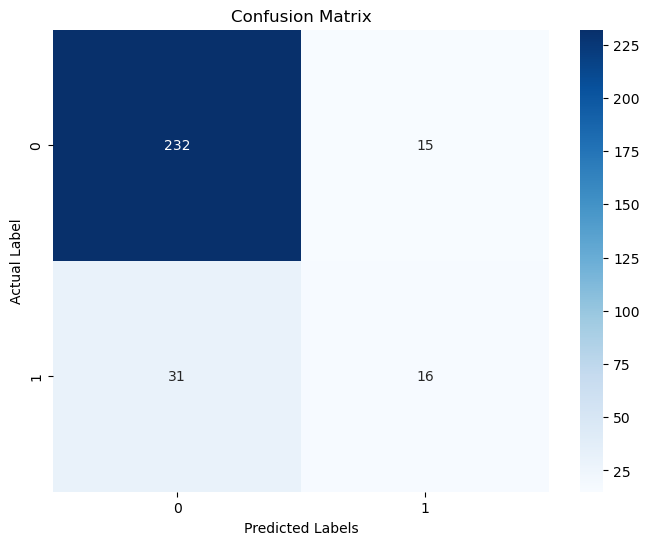

In [455]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(cat_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

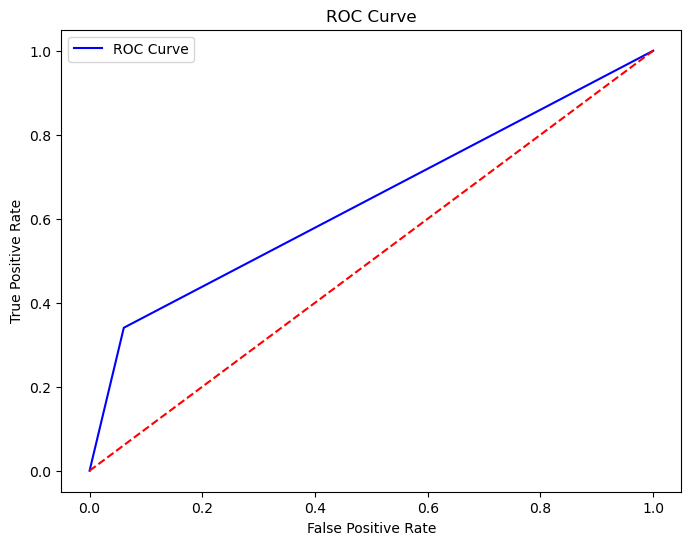

AUC 0.6398483934878112


In [456]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
cat_fpr, cat_tpr, cat_thresholds = roc_curve(ytest, cat_pred)

plt.figure(figsize=(8, 6))
plt.plot(cat_fpr, cat_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, cat_pred))

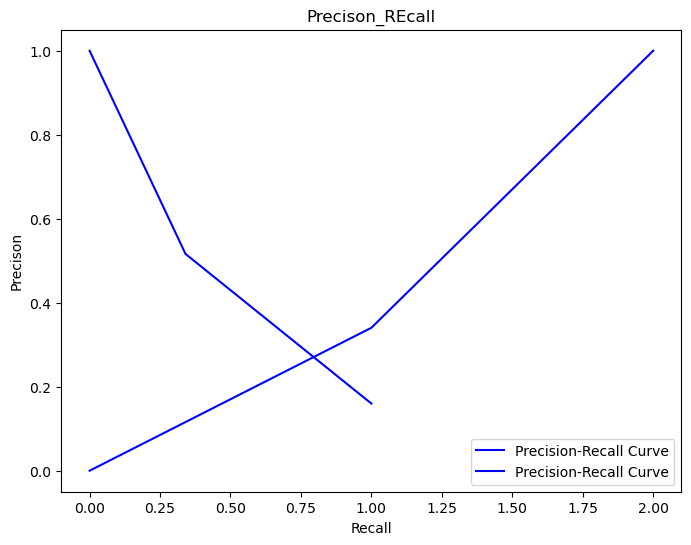

In [457]:
# Plots Precision vs Recall at different thresholds
cat_precision, cat_recall, cat_thresholds = precision_recall_curve(ytest, cat_pred)

plt.figure(figsize=(8, 6))
plt.plot(cat_recall, cat_precision, cat_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [458]:
# Classification Error
cat_accuracy = accuracy_score(ytest, cat_pred)
print('Classification Error (Accuracy):', 1 - cat_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
cat_mse = mean_squared_error(ytest, cat_pred)
print("Mean Square Error (MSE):", cat_mse)

# Cross-Entropy Loss (Log loss)
cat_log_loss_value = log_loss(ytest, cat_pred)
print("Cross-Entropy(Log Loss):", cat_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
cat_precision, cat_recall, _ = precision_recall_curve(ytest, cat_pred)
cat_auc_pr = auc(cat_recall, cat_precision)
print('AUC-PR', cat_auc_pr)

Classification Error (Accuracy): 0.15646258503401356
Mean Square Error (MSE): 0.1564625850340136
Cross-Entropy(Log Loss): 5.639483183331255
AUC-PR 0.48099837052185324


In [553]:
cat_scores = grid_search.score(xtest, ytest)
print(cat_scores)

0.41025641025641024


# XGBClassifier model

In [193]:
param_grid = {
    'n_estimaors': [100],
    'learning_rate': [0.1],
    'max_depth': [7],
    'min_child_weight': [1],
    'subsample': [0.6],
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'scale_pos_weight': [4],
}

In [194]:
xgb_model = XGBClassifier(scale_pos_weight = 4, use_label_encoder=False, eval_matric='logloss', random_state=42)

In [471]:
x_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)

In [472]:
x_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\HELLO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:41:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_matric", "n_estimaors", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_matric='logloss', eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=No...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0.1],
                         'learning_rate': [0.1], 'max_depth': [7],
                         'min_child_weight': [1], 'n_estimaors': [100],
                         'scale_pos_weight': [4], 'subsample': [0.6]},
             scoring='f1', verbose=1)

In [474]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimaors': 100, 'scale_pos_weight': 4, 'subsample': 0.6}


In [475]:
x_valid = grid_search.predict(xvalidate)

In [476]:
x_pred = grid_search.predict(xtest)

In [478]:
print('\n                  Validate Classification Report\n\n', classification_report(yvalidate, x_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.91      0.87      0.89       249
           1       0.42      0.51      0.46        45

    accuracy                           0.82       294
   macro avg       0.66      0.69      0.67       294
weighted avg       0.83      0.82      0.82       294



In [479]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, x_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.52      0.34      0.41        47

    accuracy                           0.84       294
   macro avg       0.70      0.64      0.66       294
weighted avg       0.82      0.84      0.83       294



In [480]:
xgb_model.fit(xtrain, ytrain)
xgb_valid = xgb_model.predict(xvalidate)
xgb_pred = xgb_model.predict(xtest)

C:\Users\HELLO\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:42:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [490]:
print('\n                  Validate Classification Report\n\n', classification_report(yvalidate, xgb_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.89      0.89      0.89       249
           1       0.39      0.38      0.38        45

    accuracy                           0.81       294
   macro avg       0.64      0.63      0.64       294
weighted avg       0.81      0.81      0.81       294



In [501]:
print('\n                 Validate Classification Report,', classification_report(ytest, xgb_pred))


                 Validate Classification Report,               precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.48      0.30      0.37        47

    accuracy                           0.84       294
   macro avg       0.68      0.62      0.64       294
weighted avg       0.81      0.84      0.82       294



In [555]:
# compute the classification report manually to confirm model performance
xgb_conf_matrix = confusion_matrix(ytest, xgb_pred)

TP = xgb_conf_matric[1,1]
TN = xgb_conf_matric[0,0]
FP = xgb_conf_matric[0,1]
FN = xgb_conf_matric[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.8367346938775511 
Precision: 0.4827586206896552 
Recall 0.2978723404255319 
F1-Score 0.3684210526315789 



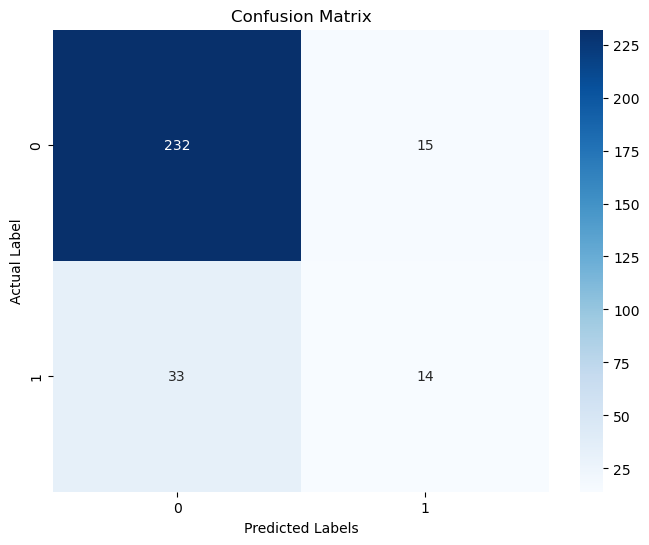

In [505]:
# Display predicted vs actual class labels
plt.figure(figsize=(8, 6))
sb.heatmap(xgb_conf_matric, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

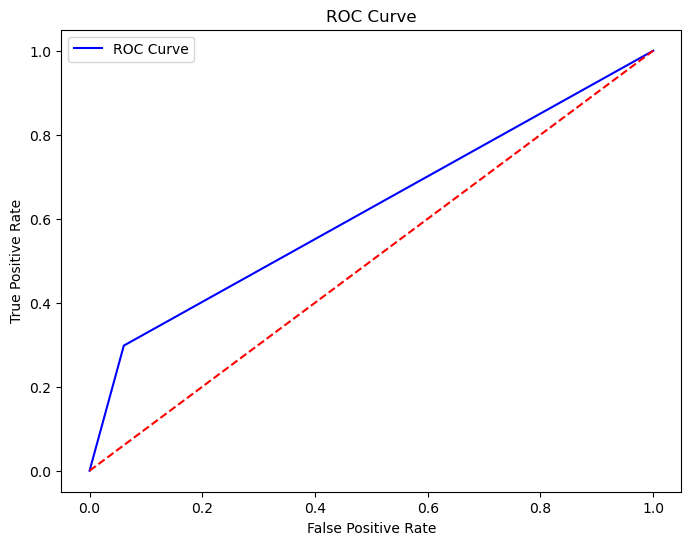

AUC 1.0


In [512]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(ytest, xgb_pred)

plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, ytest))

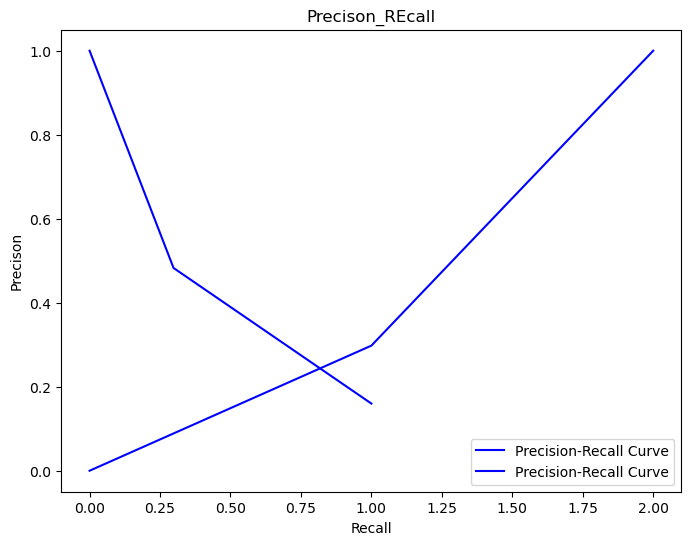

In [552]:
# Plots Precision vs Recall at different thresholds
xgb_precision, xgb_recall, xgb_thresholds = precision_recall_curve(ytest, xgb_pred)

plt.figure(figsize=(8, 6))
plt.plot(xgb_recall, xgb_precision, xgb_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [523]:
# Classification Error
xgb_accuracy = accuracy_score(ytest, xgb_pred)
print('Classification Error (Accuracy):', 1 - xgb_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
rf_mse = mean_squared_error(ytest, xgb_pred)
print("Mean Square Error (MSE):", rf_mse)

# Cross-Entropy Loss (Log loss)
log_loss_value = log_loss(ytest, xgb_pred)
print("Cross-Entropy(Log Loss):", log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(ytest, xgb_pred)
auc_pr = auc(recall, precision)
print('AUC-PR', auc_pr)

Classification Error (Accuracy): 0.16326530612244894
Mean Square Error (MSE): 0.16326530612244897
Cross-Entropy(Log Loss): 5.8846781043456575
AUC-PR 0.4464379295371854


In [551]:
xgb_scores = x_search.score(xtest, ytest)
print(xgb_scores)

0.41025641025641024


# Neural networks

In [226]:
def plot_history(history):
    figs, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
    ax1.plot(history.history["loss"], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history["accuracy"], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

In [229]:
def train_model(xtrain, ytrain, num_nodes, drop, lr, batch_size, epochs):
    nn_model = Sequential()
    nn_model.add(Input(shape=(49,)))
    nn_model.add(Dense(num_nodes, activation='relu')),
    nn_model.add(Dropout(drop)),
    nn_model.add(Dense(num_nodes, activation='relu',)),
    nn_model.add(Dropout(drop)),
    nn_model.add(Dense(1, activation='sigmoid'))

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
        xtrain, ytrain, epochs=epochs, batch_size=batch_size, validation_split=0.2
    )
    return nn_model, history

16 nodes, dropout 0, lr 0.1, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6526 - loss: 0.6485 - val_accuracy: 0.6271 - val_loss: 0.5286
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7809 - loss: 0.4440 - val_accuracy: 0.4610 - val_loss: 0.6450
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 0.4481 - val_accuracy: 0.6576 - val_loss: 0.5595
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3359 - val_accuracy: 0.5898 - val_loss: 0.5656
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8647 - loss: 0.3316 - val_accuracy: 0.6610 - val_loss: 0.4185
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8393 - loss: 0.3546 - val_accuracy: 0.6407 - val_loss: 0.4321
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.3499 - val_accuracy: 0.7424 - val_loss: 0.3781
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.816

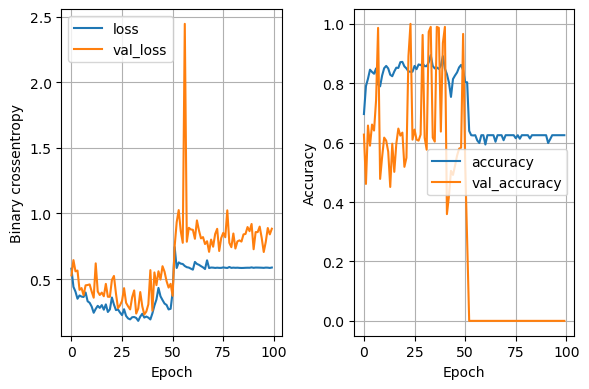

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8452 - loss: 4.5107 
>>>>>>>>>> 16 0 0.1 32 Here I am
16 nodes, dropout 0, lr 0.1, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6087 - loss: 0.7489 - val_accuracy: 0.5153 - val_loss: 0.8492
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.4397 - val_accuracy: 0.6373 - val_loss: 0.7479
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.3624 - val_accuracy: 0.6237 - val_loss: 0.5550
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8787 - loss: 0.2947 - val_accuracy: 0.6881 - val_loss: 0.3750
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8544 - loss: 0.3056 - val_accuracy: 0.6475 - val_loss: 0.5127
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.2334 - val_accuracy: 0.6780 - val_loss: 0.4626
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8727 - loss: 0.2323 - 

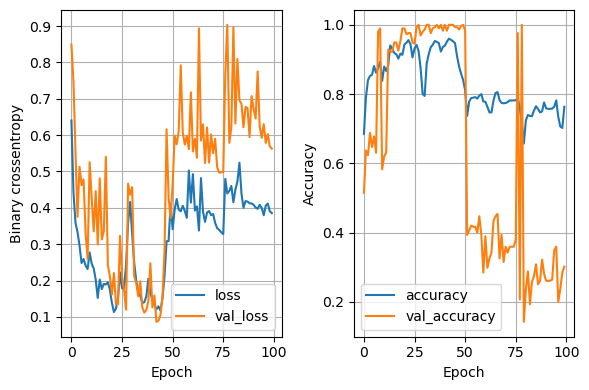

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8762 - loss: 7.7858  
16 nodes, dropout 0, lr 0.1, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5993 - loss: 0.7224 - val_accuracy: 0.0847 - val_loss: 0.8687
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7262 - loss: 0.5109 - val_accuracy: 0.6203 - val_loss: 0.8625
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7960 - loss: 0.4079 - val_accuracy: 0.6881 - val_loss: 0.5804
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8497 - loss: 0.3307 - val_accuracy: 0.7119 - val_loss: 0.6515
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8857 - loss: 0.2763 - val_accuracy: 0.7593 - val_loss: 0.4881
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9254 - loss: 0.2092 - val_accuracy: 0.7661 - val_loss: 0.4536
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9188 - loss: 0.2027 - val_accuracy: 0.7932 - val_loss

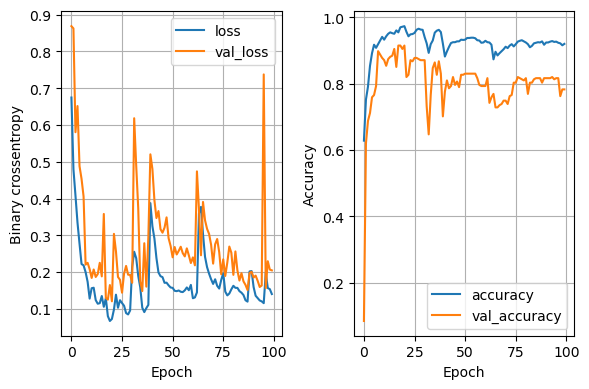

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8439 - loss: 3.6577 
16 nodes, dropout 0, lr 0.005, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6224 - loss: 0.6388 - val_accuracy: 0.5898 - val_loss: 0.7553
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8079 - loss: 0.4773 - val_accuracy: 0.6847 - val_loss: 0.6691
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8339 - loss: 0.3785 - val_accuracy: 0.7356 - val_loss: 0.6039
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3236 - val_accuracy: 0.7831 - val_loss: 0.5300
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8832 - loss: 0.2830 - val_accuracy: 0.7559 - val_loss: 0.6058
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9173 - loss: 0.2417 - val_accuracy: 0.8305 - val_loss: 0.4458
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9509 - loss: 0.1738 - val_accuracy: 0.8271 - val_loss:

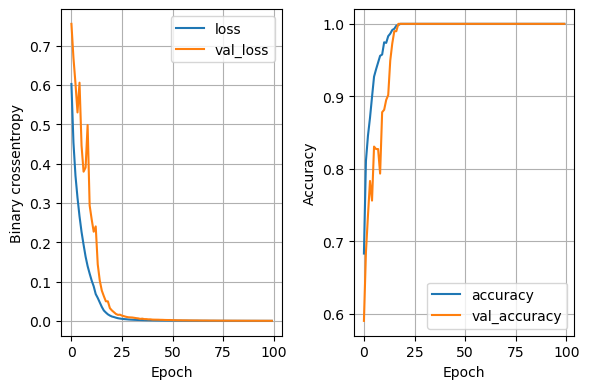

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 2.4297
>>>>>>>>>> 16 0 0.005 32 Here I am
16 nodes, dropout 0, lr 0.005, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5015 - loss: 0.7168 - val_accuracy: 0.3763 - val_loss: 0.8239
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.5421 - val_accuracy: 0.6983 - val_loss: 0.6056
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4361 - val_accuracy: 0.7085 - val_loss: 0.5672
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8515 - loss: 0.3539 - val_accuracy: 0.7119 - val_loss: 0.5906
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8940 - loss: 0.2927 - val_accuracy: 0.8034 - val_loss: 0.4611
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8824 - loss: 0.2648 - val_accuracy: 0.8305 - val_loss: 0.4113
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9217 - loss: 0.2291

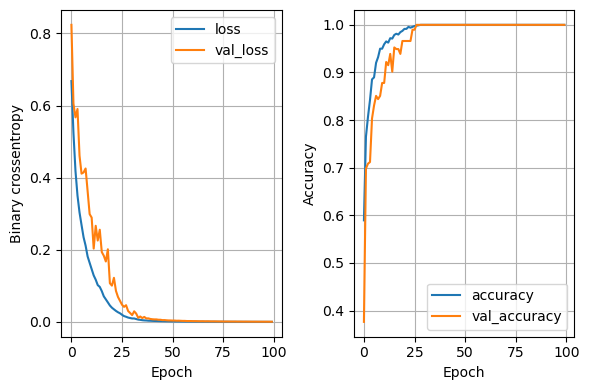

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 2.5642
16 nodes, dropout 0, lr 0.005, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4927 - loss: 0.7779 - val_accuracy: 0.4644 - val_loss: 0.7759
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6675 - loss: 0.6063 - val_accuracy: 0.5153 - val_loss: 0.8271
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7536 - loss: 0.5318 - val_accuracy: 0.5932 - val_loss: 0.7401
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7858 - loss: 0.4858 - val_accuracy: 0.6780 - val_loss: 0.6446
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7891 - loss: 0.4637 - val_accuracy: 0.6847 - val_loss: 0.6218
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8258 - loss: 0.4008 - val_accuracy: 0.6949 - val_loss: 0.6150
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8356 - loss: 0.3670 - val_accuracy: 0.7051 - val_loss

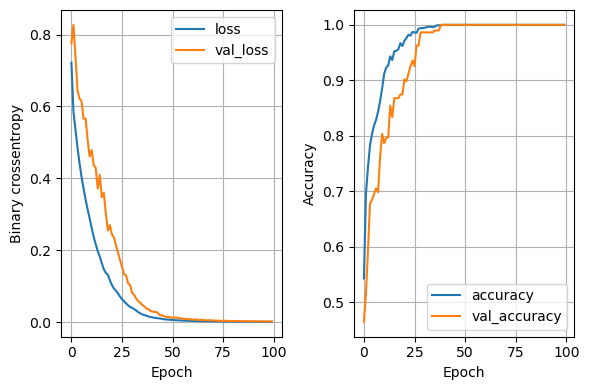

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 1.7115
>>>>>>>>>> 16 0 0.005 128 Here I am
16 nodes, dropout 0, lr 0.001, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4427 - loss: 0.7454 - val_accuracy: 0.6034 - val_loss: 0.6401
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - loss: 0.6552 - val_accuracy: 0.4814 - val_loss: 0.7089
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.6101 - val_accuracy: 0.5390 - val_loss: 0.7044
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7594 - loss: 0.5683 - val_accuracy: 0.5593 - val_loss: 0.6736
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7598 - loss: 0.5275 - val_accuracy: 0.6034 - val_loss: 0.6414
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7772 - loss: 0.4916 - val_accuracy: 0.6102 - val_loss: 0.6312
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4518

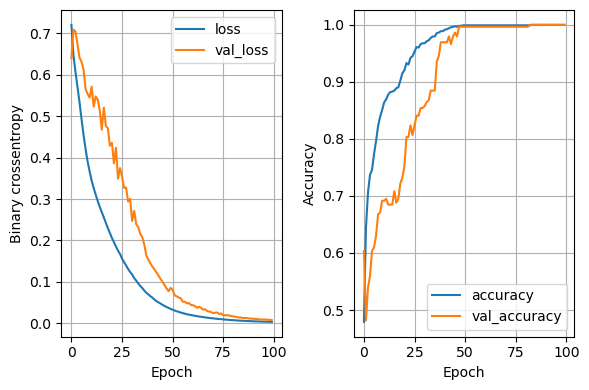

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8488 - loss: 1.2184
>>>>>>>>>> 16 0 0.001 32 Here I am
16 nodes, dropout 0, lr 0.001, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4918 - loss: 0.7433 - val_accuracy: 0.4305 - val_loss: 0.8100
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6265 - loss: 0.6520 - val_accuracy: 0.4102 - val_loss: 0.8531
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.6069 - val_accuracy: 0.4407 - val_loss: 0.8482
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.5911 - val_accuracy: 0.5153 - val_loss: 0.8148
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7344 - loss: 0.5636 - val_accuracy: 0.5085 - val_loss: 0.7862
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7480 - loss: 0.5402 - val_accuracy: 0.4983 - val_loss: 0.7765
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7602 - loss: 0.5258

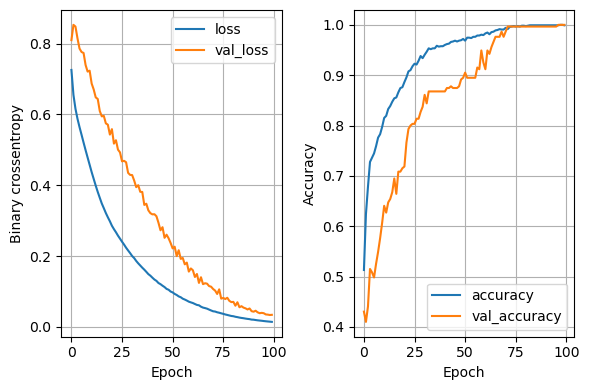

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 1.1653
>>>>>>>>>> 16 0 0.001 64 Here I am
16 nodes, dropout 0, lr 0.001, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5955 - loss: 0.6840 - val_accuracy: 0.4407 - val_loss: 0.7894
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6301 - loss: 0.6485 - val_accuracy: 0.3831 - val_loss: 0.8297
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6735 - loss: 0.6139 - val_accuracy: 0.3661 - val_loss: 0.8465
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7004 - loss: 0.5971 - val_accuracy: 0.4102 - val_loss: 0.8277
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7186 - loss: 0.5793 - val_accuracy: 0.4508 - val_loss: 0.7952
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7098 - loss: 0.5774 - val_accuracy: 0.4508 - val_loss: 0.7928
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7306 - loss: 0.544

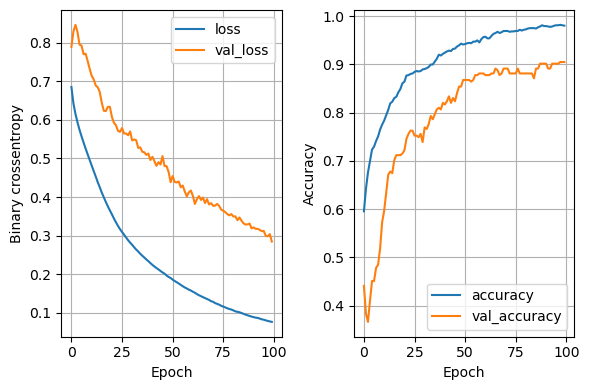

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.8686 
>>>>>>>>>> 16 0 0.001 128 Here I am
16 nodes, dropout 0.2, lr 0.1, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6079 - loss: 0.7582 - val_accuracy: 0.0881 - val_loss: 0.9714
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.6229 - val_accuracy: 0.4136 - val_loss: 0.6441
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7202 - loss: 0.5698 - val_accuracy: 0.2169 - val_loss: 0.9331
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 0.5705 - val_accuracy: 0.4339 - val_loss: 0.6395
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7153 - loss: 0.5673 - val_accuracy: 0.3932 - val_loss: 0.6213
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7074 - loss: 0.5190 - val_accuracy: 0.1424 - val_loss: 0.8561
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 0.57

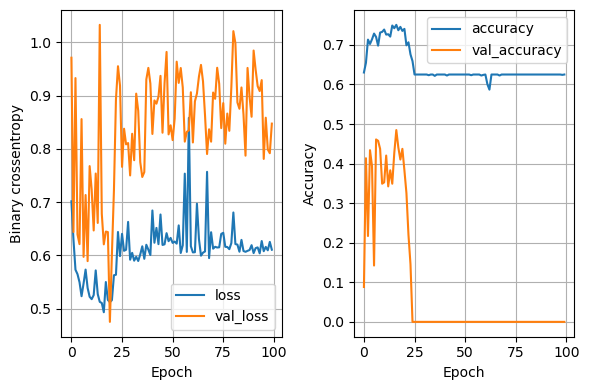

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 1.1770
16 nodes, dropout 0.2, lr 0.1, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5654 - loss: 0.8219 - val_accuracy: 0.2237 - val_loss: 0.8287
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6888 - loss: 0.5624 - val_accuracy: 0.0847 - val_loss: 0.9739
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6983 - loss: 0.5361 - val_accuracy: 0.4000 - val_loss: 0.7522
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7554 - loss: 0.4914 - val_accuracy: 0.4678 - val_loss: 0.6809
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7508 - loss: 0.4533 - val_accuracy: 0.8949 - val_loss: 0.4781
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7423 - loss: 0.4349 - val_accuracy: 0.9051 - val_loss: 0.6176
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7377 - loss: 0.4603 - val_accuracy: 0.7559 - val_loss:

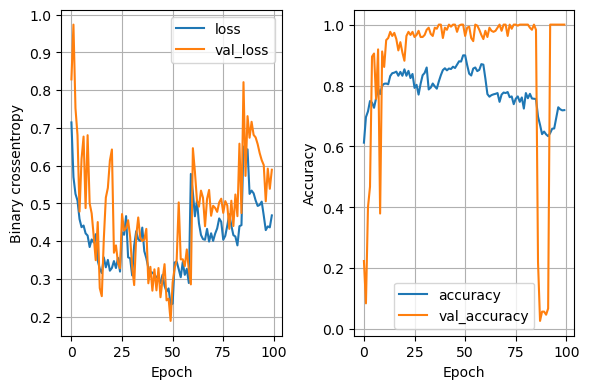

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 1.7802
16 nodes, dropout 0.2, lr 0.1, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5910 - loss: 0.8103 - val_accuracy: 0.4983 - val_loss: 0.7051
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7107 - loss: 0.5670 - val_accuracy: 0.6508 - val_loss: 0.5733
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7439 - loss: 0.5069 - val_accuracy: 0.5085 - val_loss: 0.7541
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7418 - loss: 0.4889 - val_accuracy: 0.6339 - val_loss: 0.6311
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7595 - loss: 0.4689 - val_accuracy: 0.6508 - val_loss: 0.5023
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7861 - loss: 0.4116 - val_accuracy: 0.6305 - val_loss: 0.6575
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7744 - loss: 0.4112 - val_accuracy: 0.6746 - val_loss

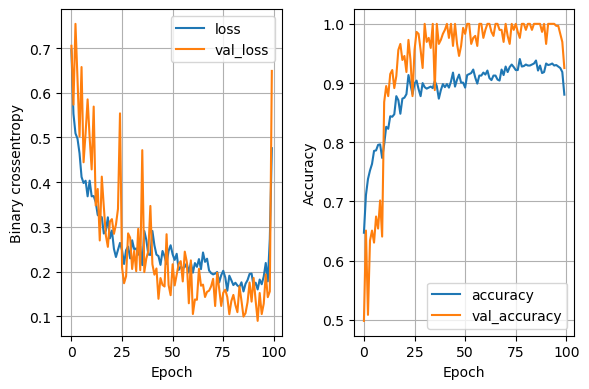

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 7.9117  
16 nodes, dropout 0.2, lr 0.005, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6081 - loss: 0.6581 - val_accuracy: 0.6271 - val_loss: 0.6401
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.5450 - val_accuracy: 0.6441 - val_loss: 0.6325
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: 0.4635 - val_accuracy: 0.5966 - val_loss: 0.6812
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8093 - loss: 0.4222 - val_accuracy: 0.7390 - val_loss: 0.5514
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.3968 - val_accuracy: 0.8068 - val_loss: 0.4576
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 0.3523 - val_accuracy: 0.7356 - val_loss: 0.5280
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8574 - loss: 0.3294 - val_accuracy: 0.7864 - val_lo

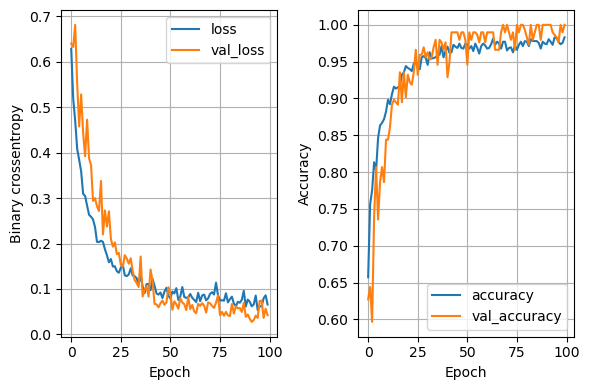

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 2.2160
16 nodes, dropout 0.2, lr 0.005, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6306 - loss: 0.6832 - val_accuracy: 0.4983 - val_loss: 0.7511
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.5655 - val_accuracy: 0.5220 - val_loss: 0.7510
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.5437 - val_accuracy: 0.6339 - val_loss: 0.6598
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7668 - loss: 0.4875 - val_accuracy: 0.6746 - val_loss: 0.6466
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7796 - loss: 0.4568 - val_accuracy: 0.7017 - val_loss: 0.6374
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8340 - loss: 0.3946 - val_accuracy: 0.7356 - val_loss: 0.5993
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8268 - loss: 0.3811 - val_accuracy: 0.7085 - val_los

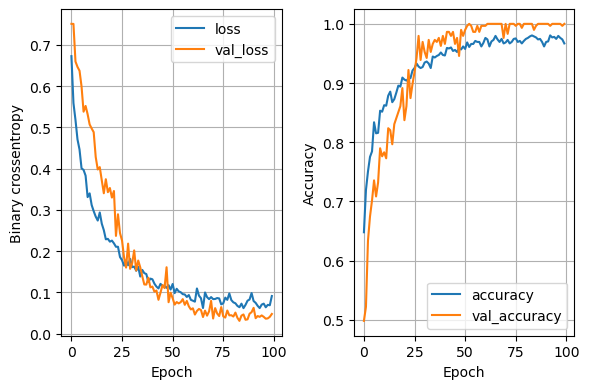

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8417 - loss: 2.6542
16 nodes, dropout 0.2, lr 0.005, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5609 - loss: 0.7418 - val_accuracy: 0.3186 - val_loss: 0.8457
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6465 - loss: 0.6398 - val_accuracy: 0.4475 - val_loss: 0.7890
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6909 - loss: 0.5838 - val_accuracy: 0.4746 - val_loss: 0.7650
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7306 - loss: 0.5484 - val_accuracy: 0.5763 - val_loss: 0.6866
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7368 - loss: 0.5333 - val_accuracy: 0.6305 - val_loss: 0.6755
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7616 - loss: 0.4941 - val_accuracy: 0.6373 - val_loss: 0.6508
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7812 - loss: 0.4475 - val_accuracy: 0.6610 - val_lo

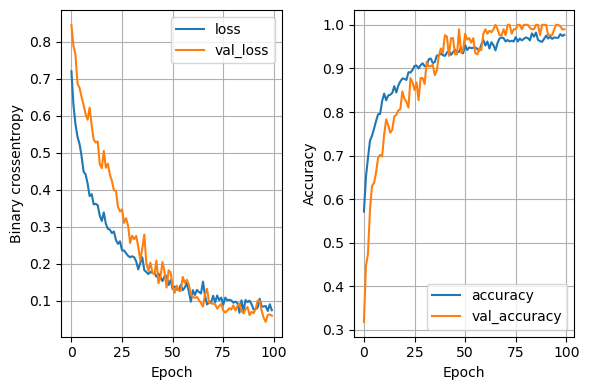

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 1.9241
16 nodes, dropout 0.2, lr 0.001, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6375 - loss: 0.7579 - val_accuracy: 0.2508 - val_loss: 0.9392
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6576 - loss: 0.6435 - val_accuracy: 0.4305 - val_loss: 0.8074
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6616 - loss: 0.6130 - val_accuracy: 0.4678 - val_loss: 0.7624
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - loss: 0.5883 - val_accuracy: 0.5085 - val_loss: 0.7250
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7139 - loss: 0.5557 - val_accuracy: 0.5492 - val_loss: 0.6960
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7303 - loss: 0.5563 - val_accuracy: 0.5695 - val_loss: 0.6887
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7407 - loss: 0.5273 - val_accuracy: 0.6102 - val_loss

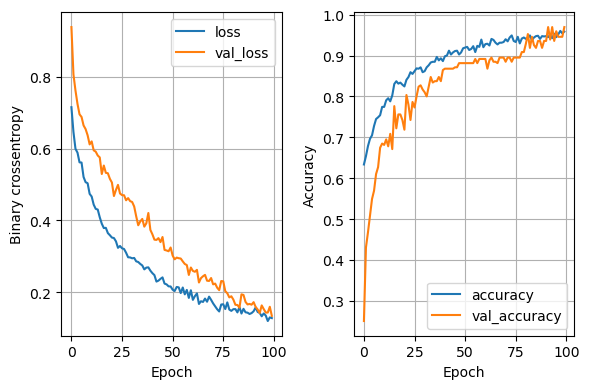

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 1.1461
16 nodes, dropout 0.2, lr 0.001, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4993 - loss: 0.8469 - val_accuracy: 0.3220 - val_loss: 0.9277
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5542 - loss: 0.7554 - val_accuracy: 0.3390 - val_loss: 0.8280
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5976 - loss: 0.6954 - val_accuracy: 0.4203 - val_loss: 0.7932
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6648 - val_accuracy: 0.4847 - val_loss: 0.7559
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6674 - loss: 0.6372 - val_accuracy: 0.4780 - val_loss: 0.7559
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.6116 - val_accuracy: 0.4915 - val_loss: 0.7342
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6981 - loss: 0.6038 - val_accuracy: 0.5458 - val_los

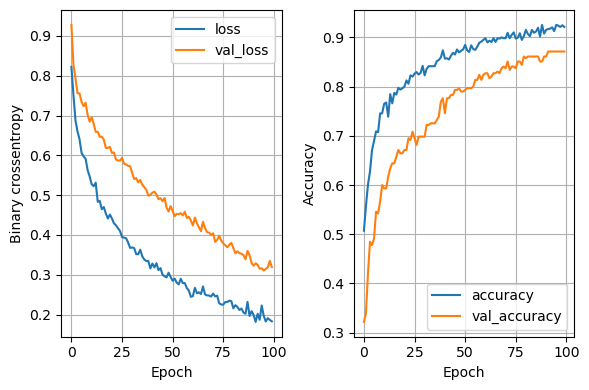

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.6711
>>>>>>>>>> 16 0.2 0.001 64 Here I am
16 nodes, dropout 0.2, lr 0.001, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4008 - loss: 0.8395 - val_accuracy: 0.9153 - val_loss: 0.5267
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4583 - loss: 0.7536 - val_accuracy: 0.8508 - val_loss: 0.5762
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4896 - loss: 0.7259 - val_accuracy: 0.7288 - val_loss: 0.6184
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5466 - loss: 0.6879 - val_accuracy: 0.6542 - val_loss: 0.6529
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6073 - loss: 0.6574 - val_accuracy: 0.5695 - val_loss: 0.6777
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6149 - loss: 0.6484 - val_accuracy: 0.5424 - val_loss: 0.6947
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6709 - loss: 0

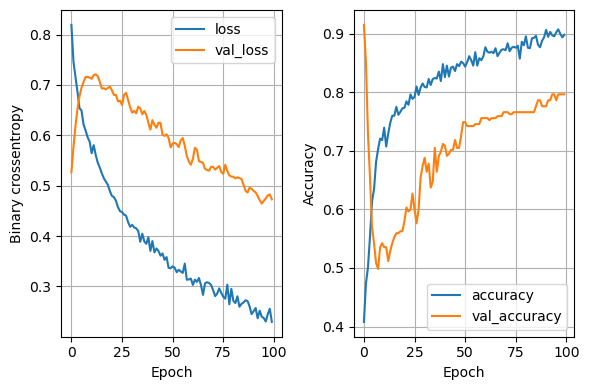

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8360 - loss: 0.5265 
>>>>>>>>>> 16 0.2 0.001 128 Here I am
32 nodes, dropout 0, lr 0.1, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5618 - loss: 0.8646 - val_accuracy: 0.7559 - val_loss: 0.9349
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7259 - loss: 0.5371 - val_accuracy: 0.8915 - val_loss: 0.6188
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7417 - loss: 0.5201 - val_accuracy: 0.8034 - val_loss: 1.1009
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.4330 - val_accuracy: 0.8983 - val_loss: 1.1131
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.5341 - val_accuracy: 0.9458 - val_loss: 0.6516
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.4917 - val_accuracy: 0.9017 - val_loss: 0.7926
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.485

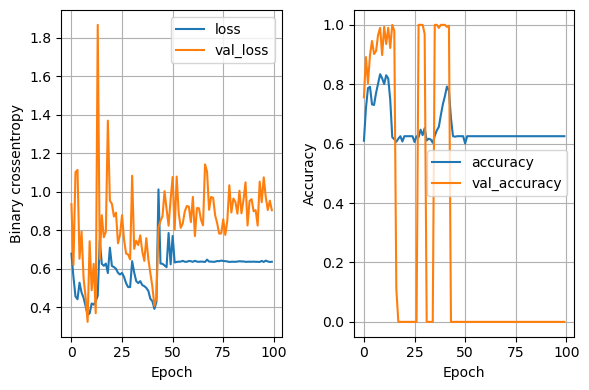

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 2.1448 
32 nodes, dropout 0, lr 0.1, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7010 - loss: 0.6587 - val_accuracy: 0.5424 - val_loss: 0.6857
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.4184 - val_accuracy: 0.6305 - val_loss: 0.5056
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 0.3336 - val_accuracy: 0.6847 - val_loss: 0.4737
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.2745 - val_accuracy: 0.6644 - val_loss: 0.4829
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.2811 - val_accuracy: 0.7492 - val_loss: 0.6566
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9014 - loss: 0.2560 - val_accuracy: 0.9424 - val_loss: 0.3319
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9118 - loss: 0.2474 - val_accuracy: 0.9288 - val_loss: 

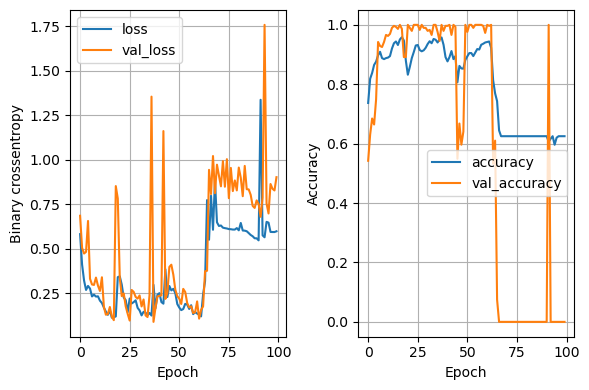

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 17.4978
32 nodes, dropout 0, lr 0.1, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5896 - loss: 0.8279 - val_accuracy: 0.2475 - val_loss: 0.8267
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7121 - loss: 0.5074 - val_accuracy: 0.6136 - val_loss: 0.7166
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8085 - loss: 0.3783 - val_accuracy: 0.6339 - val_loss: 0.5106
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8310 - loss: 0.3089 - val_accuracy: 0.8339 - val_loss: 0.3943
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8419 - loss: 0.3030 - val_accuracy: 0.7458 - val_loss: 0.6364
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8457 - loss: 0.2757 - val_accuracy: 0.6712 - val_loss: 0.4455
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8735 - loss: 0.2310 - val_accuracy: 0.9085 - val_loss:

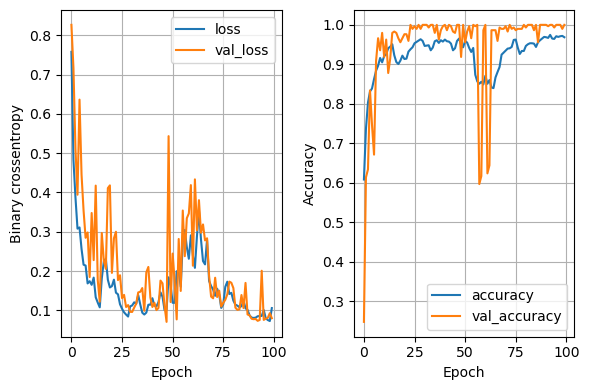

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 7.2966  
32 nodes, dropout 0, lr 0.005, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5825 - loss: 0.6868 - val_accuracy: 0.6237 - val_loss: 0.6720
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4615 - val_accuracy: 0.6644 - val_loss: 0.6354
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.3268 - val_accuracy: 0.7356 - val_loss: 0.5743
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9110 - loss: 0.2487 - val_accuracy: 0.8102 - val_loss: 0.4880
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9442 - loss: 0.1809 - val_accuracy: 0.8678 - val_loss: 0.3399
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9481 - loss: 0.1500 - val_accuracy: 0.9186 - val_loss: 0.3077
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1065 - val_accuracy: 0.9492 - val_loss

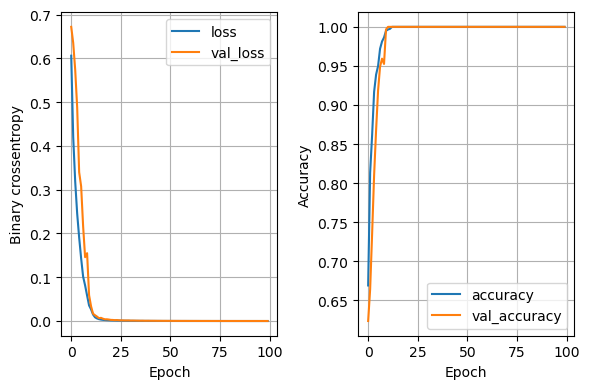

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 2.0357
32 nodes, dropout 0, lr 0.005, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6475 - loss: 0.6067 - val_accuracy: 0.6339 - val_loss: 0.6703
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8238 - loss: 0.4355 - val_accuracy: 0.7220 - val_loss: 0.6021
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.3240 - val_accuracy: 0.7729 - val_loss: 0.4919
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8943 - loss: 0.2779 - val_accuracy: 0.8237 - val_loss: 0.4384
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9163 - loss: 0.2304 - val_accuracy: 0.8271 - val_loss: 0.3946
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.2002 - val_accuracy: 0.8746 - val_loss: 0.3163
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9528 - loss: 0.1595 - val_accuracy: 0.9220 - val_loss:

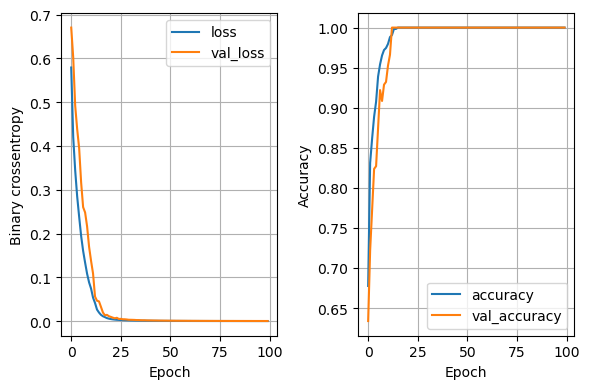

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 2.3416 
32 nodes, dropout 0, lr 0.005, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5480 - loss: 0.7082 - val_accuracy: 0.3729 - val_loss: 0.8772
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7602 - loss: 0.5171 - val_accuracy: 0.6271 - val_loss: 0.7107
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8386 - loss: 0.4266 - val_accuracy: 0.6678 - val_loss: 0.6616
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8548 - loss: 0.3596 - val_accuracy: 0.7254 - val_loss: 0.5940
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8784 - loss: 0.3122 - val_accuracy: 0.7932 - val_loss: 0.5053
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8957 - loss: 0.2769 - val_accuracy: 0.7932 - val_loss: 0.5138
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9280 - loss: 0.2262 - val_accuracy: 0.8542 - val_los

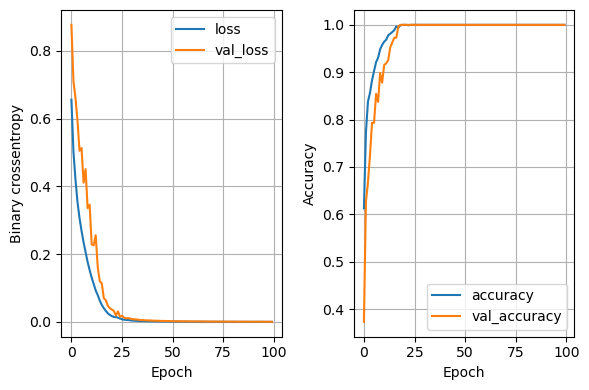

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8307 - loss: 1.6746 
32 nodes, dropout 0, lr 0.001, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5862 - loss: 0.6699 - val_accuracy: 0.3661 - val_loss: 0.8244
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - loss: 0.5741 - val_accuracy: 0.5254 - val_loss: 0.7233
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.5084 - val_accuracy: 0.5661 - val_loss: 0.6978
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4659 - val_accuracy: 0.6746 - val_loss: 0.6226
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8403 - loss: 0.3911 - val_accuracy: 0.6847 - val_loss: 0.5686
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.3691 - val_accuracy: 0.6814 - val_loss: 0.5774
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8843 - loss: 0.3104 - val_accuracy: 0.7254 - val_loss:

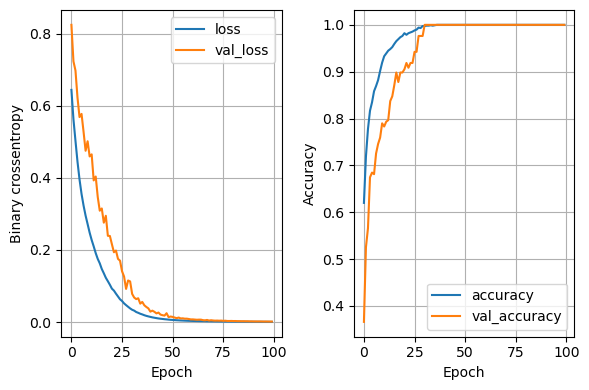

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 1.6797
32 nodes, dropout 0, lr 0.001, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4755 - loss: 0.7682 - val_accuracy: 0.5288 - val_loss: 0.7367
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6691 - loss: 0.6237 - val_accuracy: 0.4475 - val_loss: 0.7802
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7332 - loss: 0.5706 - val_accuracy: 0.5831 - val_loss: 0.7118
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 0.5161 - val_accuracy: 0.5864 - val_loss: 0.7042
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.5001 - val_accuracy: 0.6237 - val_loss: 0.6704
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8406 - loss: 0.4533 - val_accuracy: 0.6542 - val_loss: 0.6434
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8354 - loss: 0.4297 - val_accuracy: 0.6475 - val_loss:

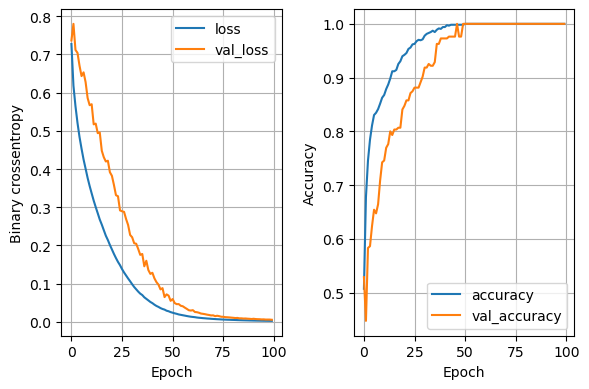

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 1.2277
32 nodes, dropout 0, lr 0.001, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5936 - loss: 0.6608 - val_accuracy: 0.2441 - val_loss: 0.8609
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6615 - loss: 0.6007 - val_accuracy: 0.3695 - val_loss: 0.7960
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7052 - loss: 0.5636 - val_accuracy: 0.4542 - val_loss: 0.7735
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7181 - loss: 0.5378 - val_accuracy: 0.5220 - val_loss: 0.7209
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7550 - loss: 0.5056 - val_accuracy: 0.5898 - val_loss: 0.6805
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7797 - loss: 0.4700 - val_accuracy: 0.6305 - val_loss: 0.6521
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7871 - loss: 0.4661 - val_accuracy: 0.6136 - val_loss

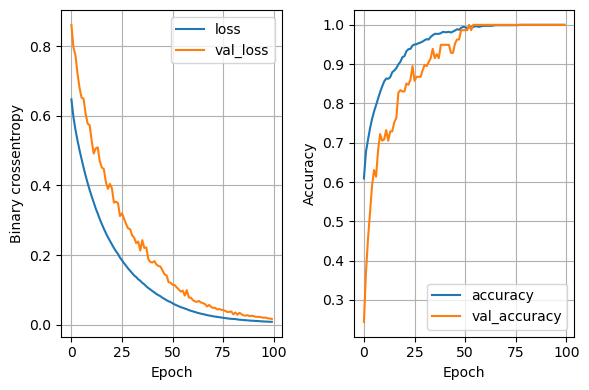

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8019 - loss: 1.3986 
32 nodes, dropout 0.2, lr 0.1, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6189 - loss: 0.9784 - val_accuracy: 0.3966 - val_loss: 0.9810
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.5398 - val_accuracy: 0.6136 - val_loss: 0.4704
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7081 - loss: 0.5472 - val_accuracy: 0.3593 - val_loss: 0.6451
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6494 - loss: 0.5699 - val_accuracy: 0.3288 - val_loss: 0.7214
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - loss: 0.5646 - val_accuracy: 0.4271 - val_loss: 0.6667
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.5458 - val_accuracy: 0.0678 - val_loss: 0.9343
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 0.6010 - val_accuracy: 0.0000e+00 - val_l

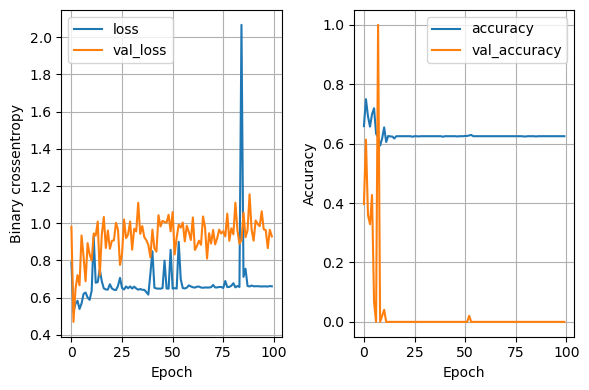

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.5685 
32 nodes, dropout 0.2, lr 0.1, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6127 - loss: 0.9082 - val_accuracy: 0.2881 - val_loss: 0.7987
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.5969 - val_accuracy: 0.2475 - val_loss: 0.9501
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7079 - loss: 0.5765 - val_accuracy: 0.3186 - val_loss: 0.8191
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.5448 - val_accuracy: 0.2644 - val_loss: 0.7330
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.5303 - val_accuracy: 0.4034 - val_loss: 0.6415
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7364 - loss: 0.5085 - val_accuracy: 0.4271 - val_loss: 0.6275
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7059 - loss: 0.5474 - val_accuracy: 0.3288 - val_loss

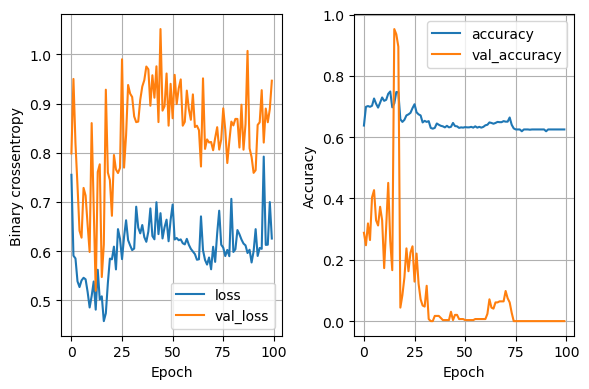

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.9861
32 nodes, dropout 0.2, lr 0.1, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5250 - loss: 1.0385 - val_accuracy: 0.0000e+00 - val_loss: 0.7445
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6435 - loss: 0.6648 - val_accuracy: 0.4576 - val_loss: 0.6677
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7189 - loss: 0.5807 - val_accuracy: 0.3390 - val_loss: 0.8990
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7441 - loss: 0.5301 - val_accuracy: 0.3593 - val_loss: 0.8932
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7499 - loss: 0.5220 - val_accuracy: 0.4780 - val_loss: 0.7359
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8112 - loss: 0.4265 - val_accuracy: 0.6237 - val_loss: 0.5373
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8154 - loss: 0.4106 - val_accuracy: 0.6271 - val_

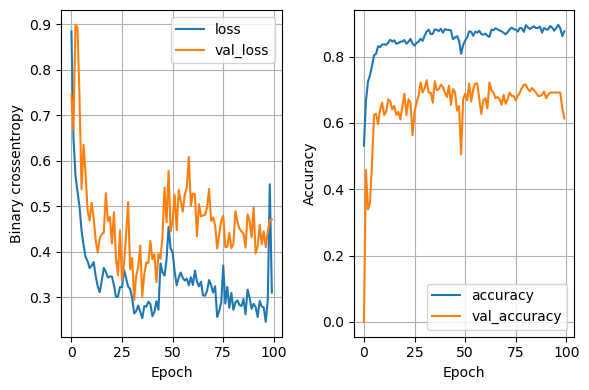

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 11.4730
32 nodes, dropout 0.2, lr 0.005, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5750 - loss: 0.7161 - val_accuracy: 0.5186 - val_loss: 0.7541
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7717 - loss: 0.4754 - val_accuracy: 0.7051 - val_loss: 0.6732
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8302 - loss: 0.4006 - val_accuracy: 0.7254 - val_loss: 0.5910
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - loss: 0.3456 - val_accuracy: 0.7966 - val_loss: 0.4992
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8470 - loss: 0.3306 - val_accuracy: 0.8441 - val_loss: 0.4062
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8812 - loss: 0.2775 - val_accuracy: 0.8475 - val_loss: 0.3715
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8918 - loss: 0.2664 - val_accuracy: 0.8068 - val_lo

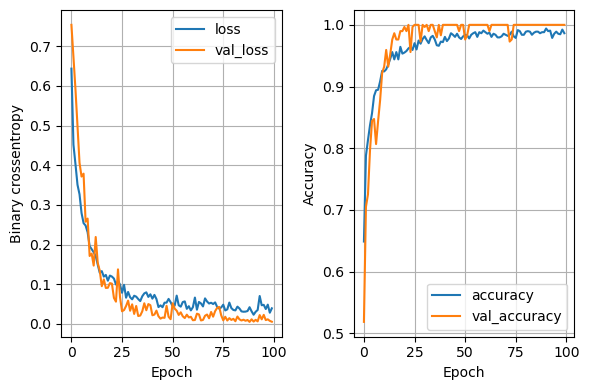

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8283 - loss: 2.6580 
32 nodes, dropout 0.2, lr 0.005, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5779 - loss: 0.6831 - val_accuracy: 0.5831 - val_loss: 0.7042
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7441 - loss: 0.5371 - val_accuracy: 0.5729 - val_loss: 0.7254
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.4410 - val_accuracy: 0.6678 - val_loss: 0.5373
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8218 - loss: 0.3813 - val_accuracy: 0.6847 - val_loss: 0.5259
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8412 - loss: 0.3508 - val_accuracy: 0.7322 - val_loss: 0.5690
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.3198 - val_accuracy: 0.7627 - val_loss: 0.4973
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8802 - loss: 0.2922 - val_accuracy: 0.7695 - val_lo

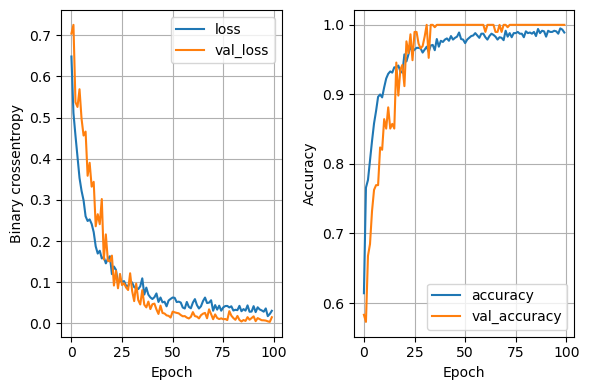

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 2.2373
32 nodes, dropout 0.2, lr 0.005, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6062 - loss: 0.6777 - val_accuracy: 0.5322 - val_loss: 0.7492
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7085 - loss: 0.5724 - val_accuracy: 0.6814 - val_loss: 0.6372
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.4937 - val_accuracy: 0.6203 - val_loss: 0.6871
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7942 - loss: 0.4450 - val_accuracy: 0.7119 - val_loss: 0.5250
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8036 - loss: 0.4184 - val_accuracy: 0.7288 - val_loss: 0.5718
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8222 - loss: 0.3778 - val_accuracy: 0.7932 - val_loss: 0.4784
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8483 - loss: 0.3610 - val_accuracy: 0.7898 - val_lo

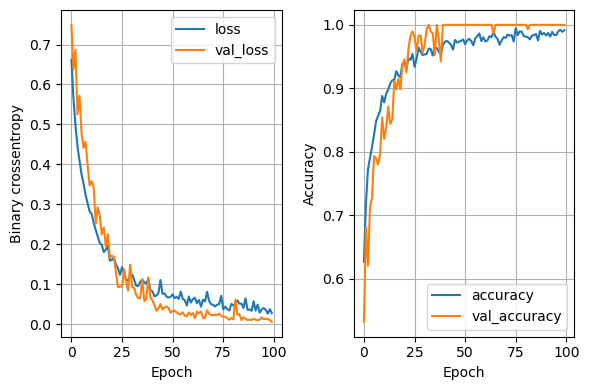

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 1.6952
32 nodes, dropout 0.2, lr 0.001, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4511 - loss: 0.8016 - val_accuracy: 0.4068 - val_loss: 0.7556
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 0.6468 - val_accuracy: 0.5119 - val_loss: 0.7373
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7106 - loss: 0.5927 - val_accuracy: 0.5695 - val_loss: 0.7018
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: 0.5338 - val_accuracy: 0.6678 - val_loss: 0.6403
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.5311 - val_accuracy: 0.6407 - val_loss: 0.6476
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.4747 - val_accuracy: 0.6881 - val_loss: 0.6040
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4458 - val_accuracy: 0.7119 - val_loss

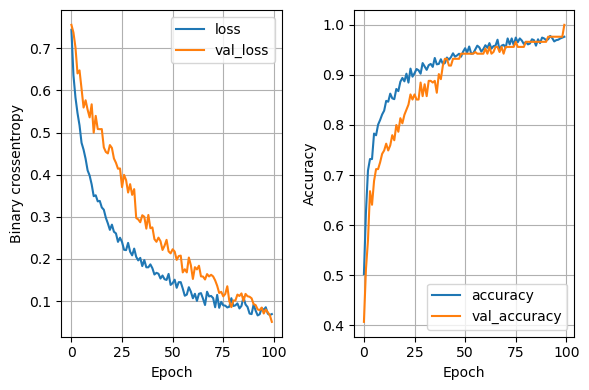

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8315 - loss: 1.0430
32 nodes, dropout 0.2, lr 0.001, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5259 - loss: 0.7425 - val_accuracy: 0.1559 - val_loss: 0.8917
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6334 - loss: 0.6686 - val_accuracy: 0.2203 - val_loss: 0.8715
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6483 - loss: 0.6364 - val_accuracy: 0.3797 - val_loss: 0.8251
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6686 - loss: 0.6073 - val_accuracy: 0.4712 - val_loss: 0.7838
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7200 - loss: 0.5749 - val_accuracy: 0.4847 - val_loss: 0.7650
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - loss: 0.5665 - val_accuracy: 0.5695 - val_loss: 0.7105
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.5378 - val_accuracy: 0.6136 - val_los

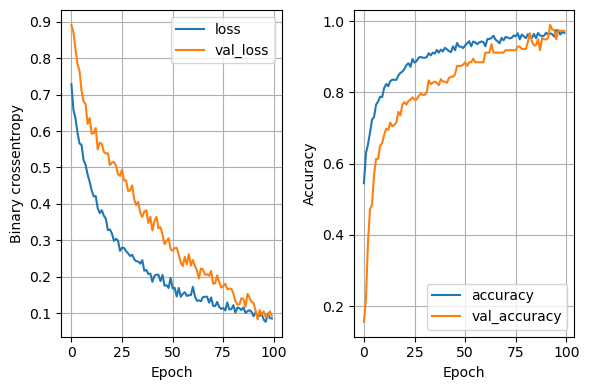

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.7302
32 nodes, dropout 0.2, lr 0.001, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4660 - loss: 0.7736 - val_accuracy: 0.3458 - val_loss: 0.8026
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5674 - loss: 0.6989 - val_accuracy: 0.2780 - val_loss: 0.8655
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6135 - loss: 0.6555 - val_accuracy: 0.2678 - val_loss: 0.8874
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6610 - loss: 0.6307 - val_accuracy: 0.3220 - val_loss: 0.8566
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6417 - loss: 0.6348 - val_accuracy: 0.3864 - val_loss: 0.8331
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6838 - loss: 0.5982 - val_accuracy: 0.4644 - val_loss: 0.8059
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7056 - loss: 0.5754 - val_accuracy: 0.4780 - val_lo

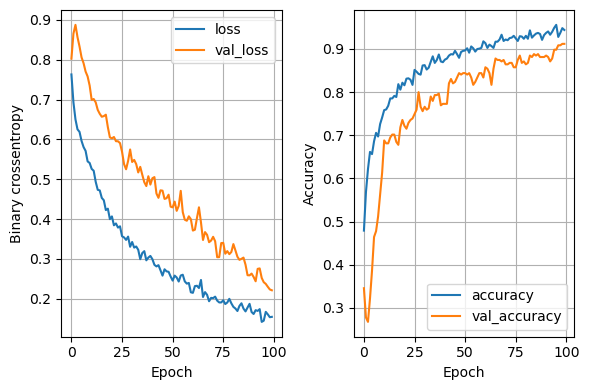

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.6444
64 nodes, dropout 0, lr 0.1, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5815 - loss: 0.9943 - val_accuracy: 0.0000e+00 - val_loss: 0.8136
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5847 - loss: 0.6174 - val_accuracy: 0.0000e+00 - val_loss: 0.8048
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6258 - loss: 0.6088 - val_accuracy: 0.0000e+00 - val_loss: 0.7256
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6634 - loss: 0.5675 - val_accuracy: 0.0000e+00 - val_loss: 0.8281
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6396 - loss: 0.5020 - val_accuracy: 0.9898 - val_loss: 0.5222
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7395 - loss: 0.4725 - val_accuracy: 0.9119 - val_loss: 0.7485
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.4314 - val_accuracy: 1.000

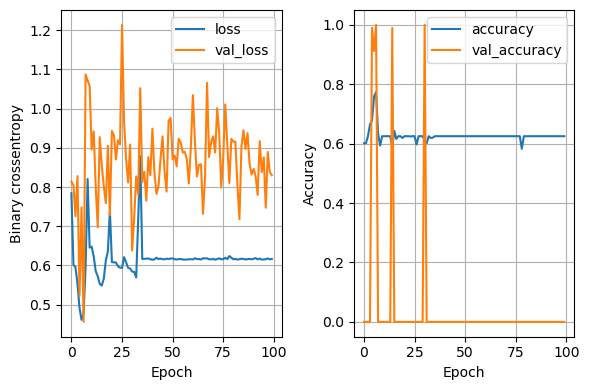

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 4.7067 
64 nodes, dropout 0, lr 0.1, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6173 - loss: 1.6527 - val_accuracy: 0.4712 - val_loss: 0.6778
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 0.5065 - val_accuracy: 0.6068 - val_loss: 0.6265
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.3632 - val_accuracy: 0.6780 - val_loss: 0.5311
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8739 - loss: 0.3003 - val_accuracy: 0.6847 - val_loss: 0.4878
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8810 - loss: 0.2605 - val_accuracy: 0.6881 - val_loss: 0.3906
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8795 - loss: 0.2362 - val_accuracy: 0.7186 - val_loss: 0.3105
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8732 - loss: 0.2973 - val_accuracy: 0.6542 - val_loss: 

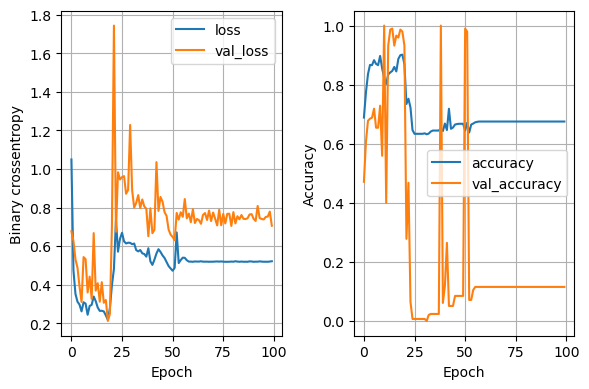

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 6.2555  
64 nodes, dropout 0, lr 0.1, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4999 - loss: 2.2505 - val_accuracy: 0.0000e+00 - val_loss: 0.7061
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6392 - loss: 0.6820 - val_accuracy: 0.0000e+00 - val_loss: 0.9381
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6160 - loss: 0.6654 - val_accuracy: 0.0000e+00 - val_loss: 1.0359
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6259 - loss: 0.6610 - val_accuracy: 0.0068 - val_loss: 0.9954
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6356 - loss: 0.6559 - val_accuracy: 0.0508 - val_loss: 0.9408
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6383 - loss: 0.6523 - val_accuracy: 0.0949 - val_loss: 0.9079
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6832 - loss: 0.6196 - val_accuracy: 0.169

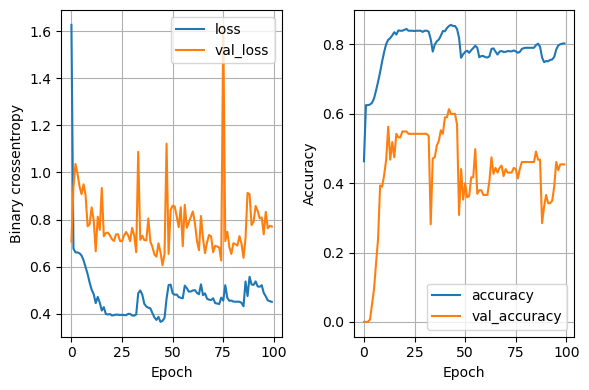

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.7126
64 nodes, dropout 0, lr 0.005, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6927 - loss: 0.5846 - val_accuracy: 0.7017 - val_loss: 0.5760
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8493 - loss: 0.3329 - val_accuracy: 0.7458 - val_loss: 0.5389
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9079 - loss: 0.2294 - val_accuracy: 0.8475 - val_loss: 0.2905
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9570 - loss: 0.1418 - val_accuracy: 0.9051 - val_loss: 0.2182
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9743 - loss: 0.0937 - val_accuracy: 0.9898 - val_loss: 0.0719
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9862 - loss: 0.0575 - val_accuracy: 0.9966 - val_loss: 0.0358
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9917 - loss: 0.0370 - val_accuracy: 0.9797 - val_loss:

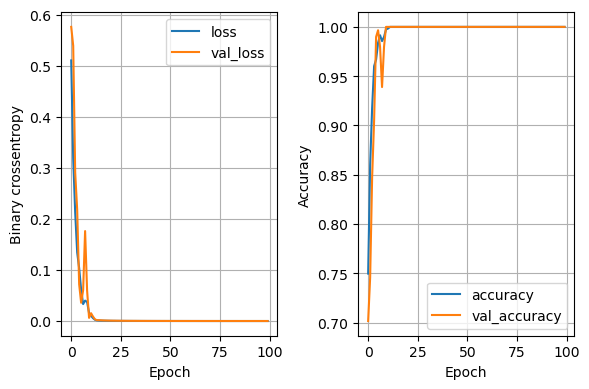

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8461 - loss: 1.7408
64 nodes, dropout 0, lr 0.005, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6644 - loss: 0.6137 - val_accuracy: 0.5525 - val_loss: 0.8015
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8451 - loss: 0.3715 - val_accuracy: 0.7661 - val_loss: 0.5963
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8937 - loss: 0.2752 - val_accuracy: 0.7492 - val_loss: 0.5143
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9414 - loss: 0.1748 - val_accuracy: 0.8644 - val_loss: 0.2920
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9552 - loss: 0.1327 - val_accuracy: 0.9119 - val_loss: 0.2742
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9786 - loss: 0.0991 - val_accuracy: 0.9322 - val_loss: 0.2034
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0596 - val_accuracy: 0.9763 - val_loss:

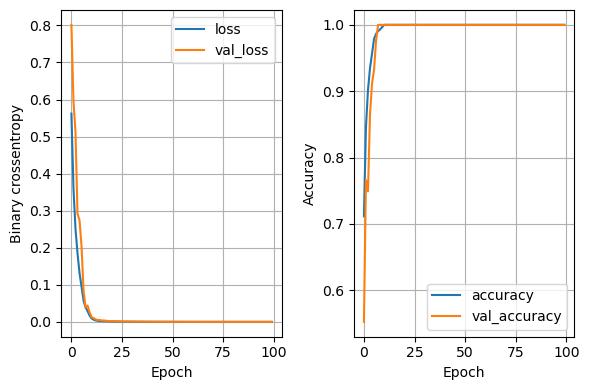

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 1.9635
64 nodes, dropout 0, lr 0.005, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5998 - loss: 0.6698 - val_accuracy: 0.6712 - val_loss: 0.6146
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7963 - loss: 0.4542 - val_accuracy: 0.6712 - val_loss: 0.6243
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8647 - loss: 0.3485 - val_accuracy: 0.7932 - val_loss: 0.4507
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8885 - loss: 0.2759 - val_accuracy: 0.8034 - val_loss: 0.4554
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 0.2195 - val_accuracy: 0.8068 - val_loss: 0.3968
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9477 - loss: 0.1731 - val_accuracy: 0.8610 - val_loss: 0.3550
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9609 - loss: 0.1427 - val_accuracy: 0.8983 - val_loss

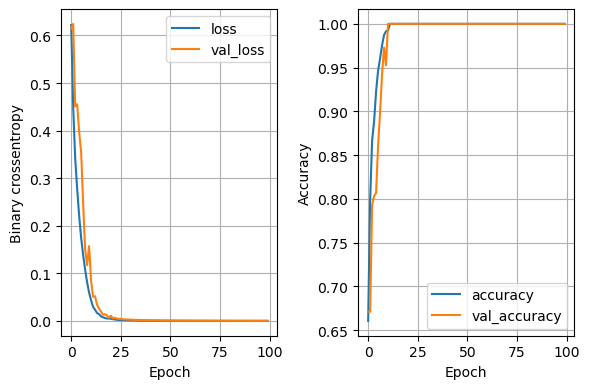

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 1.8145 
64 nodes, dropout 0, lr 0.001, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6096 - loss: 0.6640 - val_accuracy: 0.5525 - val_loss: 0.7043
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.5173 - val_accuracy: 0.5898 - val_loss: 0.6838
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8252 - loss: 0.4327 - val_accuracy: 0.6983 - val_loss: 0.5707
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.3876 - val_accuracy: 0.7119 - val_loss: 0.5572
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3384 - val_accuracy: 0.8000 - val_loss: 0.4702
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9020 - loss: 0.2711 - val_accuracy: 0.8373 - val_loss: 0.4071
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9348 - loss: 0.2198 - val_accuracy: 0.8678 - val_loss:

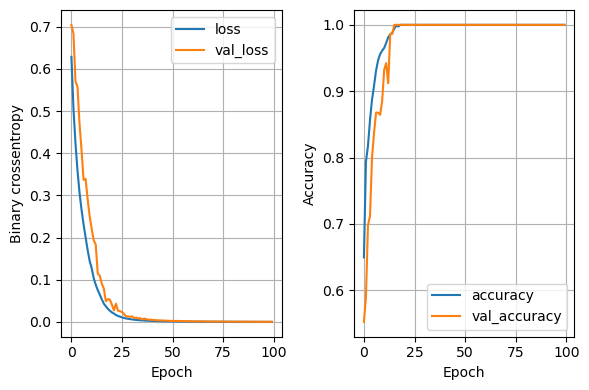

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 1.7010
64 nodes, dropout 0, lr 0.001, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5754 - loss: 0.7018 - val_accuracy: 0.2881 - val_loss: 0.9464
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7335 - loss: 0.5603 - val_accuracy: 0.6305 - val_loss: 0.6450
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8208 - loss: 0.4564 - val_accuracy: 0.6305 - val_loss: 0.6331
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8106 - loss: 0.4218 - val_accuracy: 0.6373 - val_loss: 0.6005
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.3701 - val_accuracy: 0.7186 - val_loss: 0.5284
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8633 - loss: 0.3352 - val_accuracy: 0.7153 - val_loss: 0.5538
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8839 - loss: 0.3139 - val_accuracy: 0.7458 - val_loss:

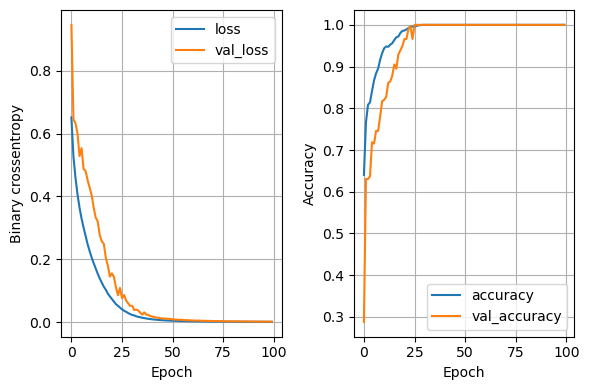

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 1.5426 
64 nodes, dropout 0, lr 0.001, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4638 - loss: 0.7705 - val_accuracy: 0.2780 - val_loss: 0.9141
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6995 - loss: 0.6047 - val_accuracy: 0.3288 - val_loss: 0.8932
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7509 - loss: 0.5537 - val_accuracy: 0.5390 - val_loss: 0.7718
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7818 - loss: 0.5042 - val_accuracy: 0.6441 - val_loss: 0.6905
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7944 - loss: 0.4800 - val_accuracy: 0.6576 - val_loss: 0.6432
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8189 - loss: 0.4381 - val_accuracy: 0.6136 - val_loss: 0.6943
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8331 - loss: 0.4174 - val_accuracy: 0.6814 - val_los

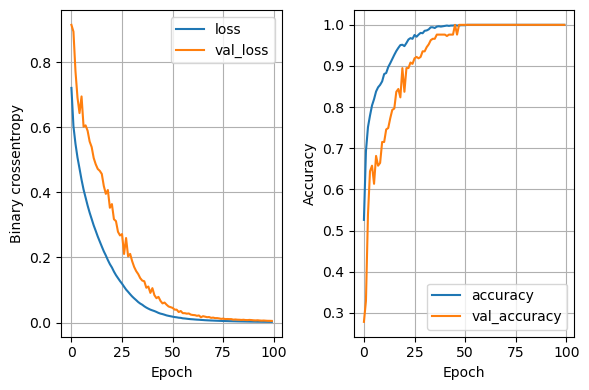

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8101 - loss: 1.1222
64 nodes, dropout 0.2, lr 0.1, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6037 - loss: 1.3278 - val_accuracy: 0.0915 - val_loss: 1.2531
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 0.6257 - val_accuracy: 0.1729 - val_loss: 0.9349
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6985 - loss: 0.6120 - val_accuracy: 0.3390 - val_loss: 0.7331
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6965 - loss: 0.5722 - val_accuracy: 0.9017 - val_loss: 0.7079
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6323 - loss: 0.5805 - val_accuracy: 0.0542 - val_loss: 1.0408
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6823 - loss: 0.5865 - val_accuracy: 0.2712 - val_loss: 0.7265
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.6359 - val_accuracy: 0.2068 - val_loss:

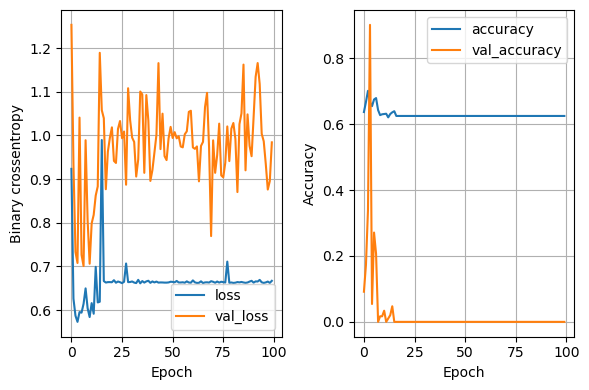

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.5481
64 nodes, dropout 0.2, lr 0.1, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5976 - loss: 1.6312 - val_accuracy: 0.2203 - val_loss: 0.9664
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 0.5281 - val_accuracy: 0.4576 - val_loss: 0.6022
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.4308 - val_accuracy: 0.8271 - val_loss: 0.5889
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8152 - loss: 0.4265 - val_accuracy: 0.9559 - val_loss: 0.4798
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7517 - loss: 0.4820 - val_accuracy: 0.9186 - val_loss: 0.5599
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7647 - loss: 0.4812 - val_accuracy: 0.8780 - val_loss: 0.6364
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8187 - loss: 0.3703 - val_accuracy: 0.8237 - val_loss:

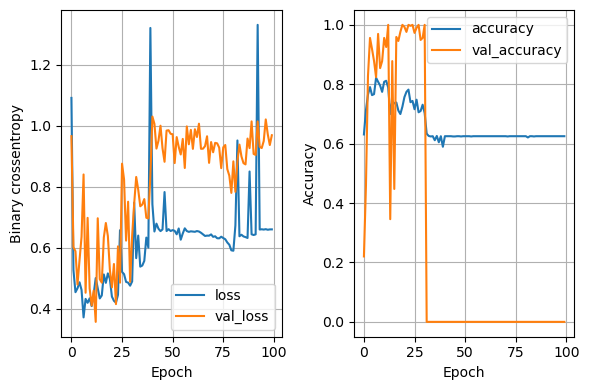

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.5512 
64 nodes, dropout 0.2, lr 0.1, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5375 - loss: 1.7308 - val_accuracy: 0.9254 - val_loss: 0.6484
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5572 - loss: 0.6530 - val_accuracy: 0.0339 - val_loss: 0.9199
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6601 - loss: 0.5600 - val_accuracy: 0.3525 - val_loss: 0.6679
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7055 - loss: 0.5231 - val_accuracy: 0.3153 - val_loss: 0.7720
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7225 - loss: 0.4898 - val_accuracy: 0.4475 - val_loss: 0.6657
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7682 - loss: 0.4696 - val_accuracy: 0.3288 - val_loss: 0.7460
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7427 - loss: 0.4401 - val_accuracy: 0.4068 - val_los

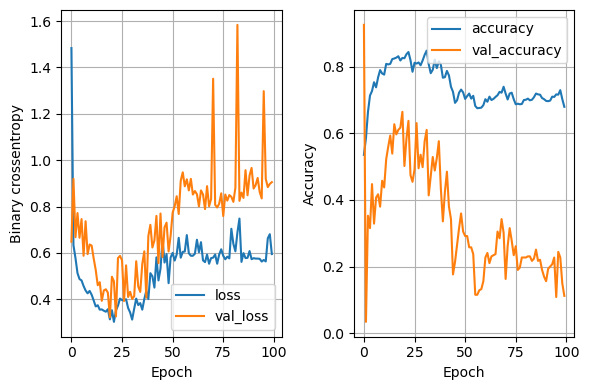

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8470 - loss: 0.5117
64 nodes, dropout 0.2, lr 0.005, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6765 - loss: 0.6177 - val_accuracy: 0.7220 - val_loss: 0.5488
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8152 - loss: 0.4044 - val_accuracy: 0.7593 - val_loss: 0.5226
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3044 - val_accuracy: 0.8373 - val_loss: 0.3685
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8806 - loss: 0.2821 - val_accuracy: 0.8407 - val_loss: 0.3929
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9253 - loss: 0.2095 - val_accuracy: 0.8881 - val_loss: 0.2543
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9255 - loss: 0.1688 - val_accuracy: 0.9085 - val_loss: 0.2683
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9300 - loss: 0.1674 - val_accuracy: 0.9153 - val_loss

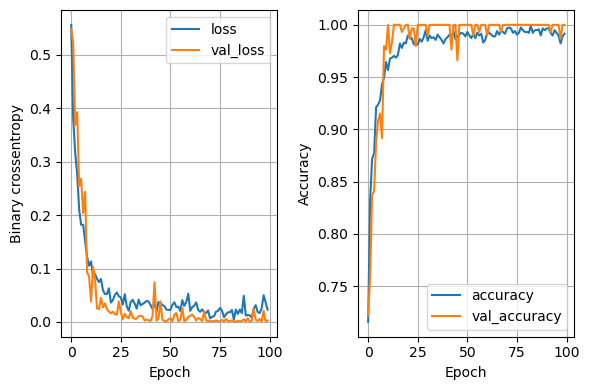

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8262 - loss: 2.1689 
64 nodes, dropout 0.2, lr 0.005, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6746 - loss: 0.6276 - val_accuracy: 0.7017 - val_loss: 0.6082
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7930 - loss: 0.4333 - val_accuracy: 0.7729 - val_loss: 0.5396
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8539 - loss: 0.3296 - val_accuracy: 0.8169 - val_loss: 0.4407
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8796 - loss: 0.2945 - val_accuracy: 0.8373 - val_loss: 0.4231
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9019 - loss: 0.2581 - val_accuracy: 0.8407 - val_loss: 0.3583
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8994 - loss: 0.2325 - val_accuracy: 0.8780 - val_loss: 0.3359
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9395 - loss: 0.1743 - val_accuracy: 0.9288 - val_lo

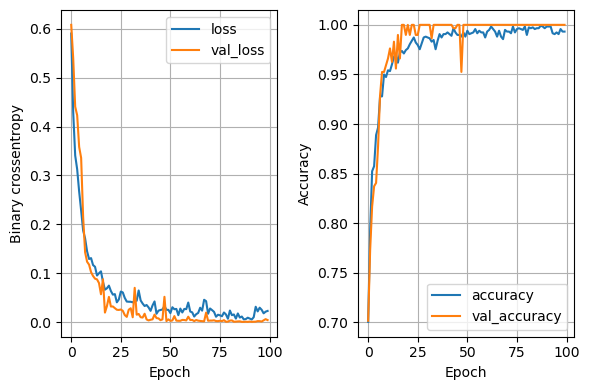

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 2.4471
64 nodes, dropout 0.2, lr 0.005, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5505 - loss: 0.7572 - val_accuracy: 0.6102 - val_loss: 0.7148
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7566 - loss: 0.5264 - val_accuracy: 0.5525 - val_loss: 0.7382
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7978 - loss: 0.4679 - val_accuracy: 0.6847 - val_loss: 0.5766
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8222 - loss: 0.3676 - val_accuracy: 0.6983 - val_loss: 0.5370
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8634 - loss: 0.3287 - val_accuracy: 0.7356 - val_loss: 0.5194
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8566 - loss: 0.3133 - val_accuracy: 0.7559 - val_loss: 0.4649
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8949 - loss: 0.2617 - val_accuracy: 0.7898 - val_lo

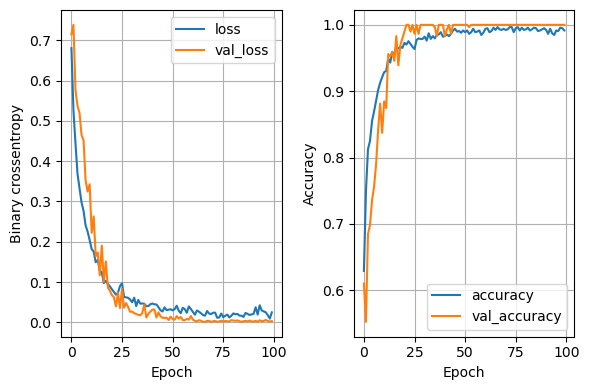

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8370 - loss: 1.8824
64 nodes, dropout 0.2, lr 0.001, batch_size 32
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6024 - loss: 0.6735 - val_accuracy: 0.5220 - val_loss: 0.7236
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7265 - loss: 0.5429 - val_accuracy: 0.6203 - val_loss: 0.6597
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7697 - loss: 0.5087 - val_accuracy: 0.7153 - val_loss: 0.5654
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4573 - val_accuracy: 0.7559 - val_loss: 0.4981
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8262 - loss: 0.4028 - val_accuracy: 0.7390 - val_loss: 0.5385
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.3692 - val_accuracy: 0.7559 - val_loss: 0.5096
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3453 - val_accuracy: 0.7797 - val_loss

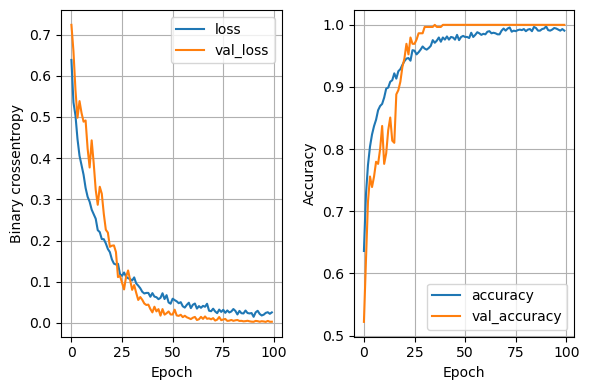

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 1.3193
64 nodes, dropout 0.2, lr 0.001, batch_size 64
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5282 - loss: 0.7365 - val_accuracy: 0.0949 - val_loss: 1.0286
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.6180 - val_accuracy: 0.4881 - val_loss: 0.7867
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5897 - val_accuracy: 0.5254 - val_loss: 0.7684
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.5378 - val_accuracy: 0.6136 - val_loss: 0.7023
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7262 - loss: 0.5201 - val_accuracy: 0.6339 - val_loss: 0.6661
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7738 - loss: 0.4850 - val_accuracy: 0.6542 - val_loss: 0.6435
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7712 - loss: 0.4810 - val_accuracy: 0.6780 - val_los

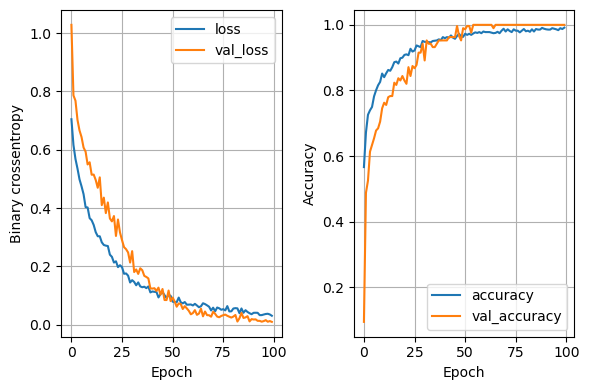

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 1.1435
64 nodes, dropout 0.2, lr 0.001, batch_size 128
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5848 - loss: 0.7018 - val_accuracy: 0.2780 - val_loss: 0.8268
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6515 - loss: 0.6322 - val_accuracy: 0.3966 - val_loss: 0.7779
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7019 - loss: 0.5884 - val_accuracy: 0.6102 - val_loss: 0.7256
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7244 - loss: 0.5556 - val_accuracy: 0.6169 - val_loss: 0.7191
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7420 - loss: 0.5241 - val_accuracy: 0.6237 - val_loss: 0.7026
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7986 - loss: 0.4864 - val_accuracy: 0.6678 - val_loss: 0.6334
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7834 - loss: 0.4815 - val_accuracy: 0.6915 - val_lo

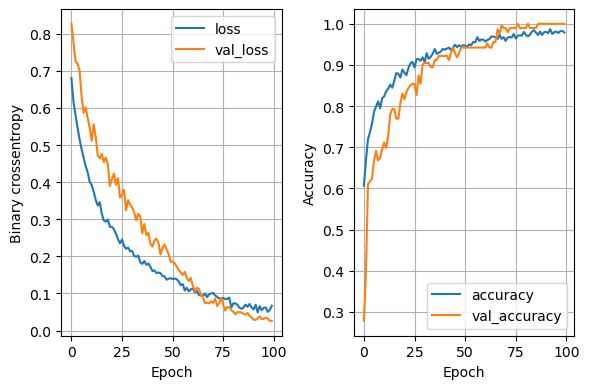

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8109 - loss: 0.9382


In [230]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for drop in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {drop}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(xtrain, ytrain, num_nodes, drop, lr, batch_size, epochs)
                plot_history(history)
                val_loss, *rest = model.evaluate(xvalidate, yvalidate)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
                    print('>>>>>>>>>>', num_nodes, drop, lr, batch_size, "Here I am")

In [525]:
nn_valid = least_loss_model.predict(xvalidate)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [526]:
nn_pred = least_loss_model.predict(xtest)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [529]:
nn_valid = (y_valid > 0.5).astype(int).reshape(-1)
nn_pred = (y_pred > 0.5).astype(int).reshape(-1)

In [530]:
print('\n                  Validate Classification Report\n\n', classification_report(yvalidate, nn_valid))


                  Validate Classification Report

               precision    recall  f1-score   support

           0       0.89      0.89      0.89       249
           1       0.39      0.38      0.38        45

    accuracy                           0.81       294
   macro avg       0.64      0.63      0.64       294
weighted avg       0.81      0.81      0.81       294



In [531]:
print('\n                  Testing Classification Report\n\n', classification_report(ytest, nn_pred))


                  Testing Classification Report

               precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.48      0.30      0.37        47

    accuracy                           0.84       294
   macro avg       0.68      0.62      0.64       294
weighted avg       0.81      0.84      0.82       294



In [532]:
# compute the classification report manually to confirm model performance
nn_conf_metrix = confusion_matrix(ytest, nn_pred)

TP = nn_conf_metrix[1,1]
TN = nn_conf_metrix[0,0]
FP = nn_conf_metrix[0,1]
FN = nn_conf_metrix[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print('\nAccuracy:', accuracy, '\nPrecision:', precision, '\nRecall', recall, '\nF1-Score', f1_score, '\n')


Accuracy: 0.8367346938775511 
Precision: 0.4827586206896552 
Recall 0.2978723404255319 
F1-Score 0.3684210526315789 



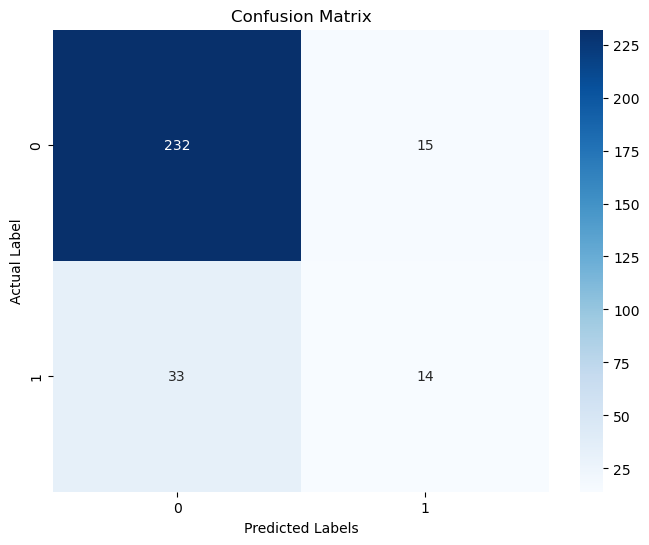

In [533]:
plt.figure(figsize=(8, 6))
sb.heatmap(nn_conf_metrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

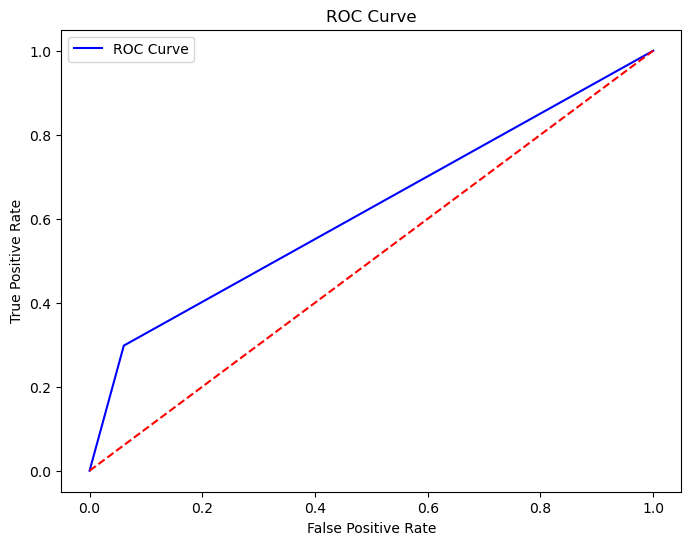

AUC 0.6185717977431303


In [534]:
# Plots True Positive Rate (TPR) vs False Positive Rate (FPT) at different thresholds
nn_fpr, nn_tpr, nn_thresholds = roc_curve(ytest, nn_pred)

plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC', roc_auc_score(ytest, nn_pred))

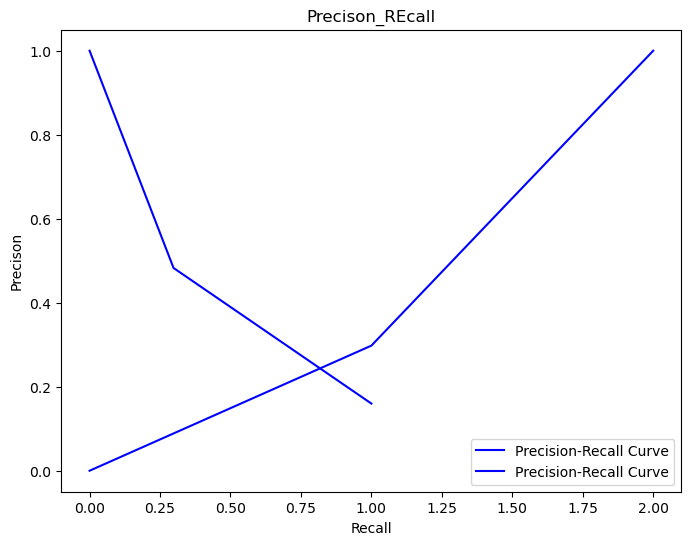

In [535]:
# Plots Precision vs Recall at different thresholds
nn_precision, nn_recall, nn_thresholds = precision_recall_curve(ytest, nn_pred)

plt.figure(figsize=(8, 6))
plt.plot(nn_recall, nn_precision, nn_tpr, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Precison_REcall')
plt.legend()
plt.show()

In [536]:
# Classification Error
nn_accuracy = accuracy_score(ytest, nn_pred)
print('Classification Error (Accuracy):', 1 - nn_accuracy)

# Mean Square Error
# MSE is typically used for regression problems, not classification
nn_mse = mean_squared_error(ytest, nn_pred)
print("Mean Square Error (MSE):", nn_mse)

# Cross-Entropy Loss (Log loss)
nn_log_loss_value = log_loss(ytest, nn_pred)
print("Cross-Entropy(Log Loss):", nn_log_loss_value)

# AUC-PR (Area Under Precision-Recall Curve)
nn_precision, nn_recall, _ = precision_recall_curve(ytest, nn_pred)
nn_auc_pr = auc(nn_recall, nn_precision)
print('AUC-PR', nn_auc_pr)

Classification Error (Accuracy): 0.16326530612244894
Mean Square Error (MSE): 0.16326530612244897
Cross-Entropy(Log Loss): 5.8846781043456575
AUC-PR 0.4464379295371854


In [549]:
nn_scores = nn_model.score(xtest, ytest)
print(nn_scores)

0.8299319727891157


# Model Comparision

* ROC Curves Comparison

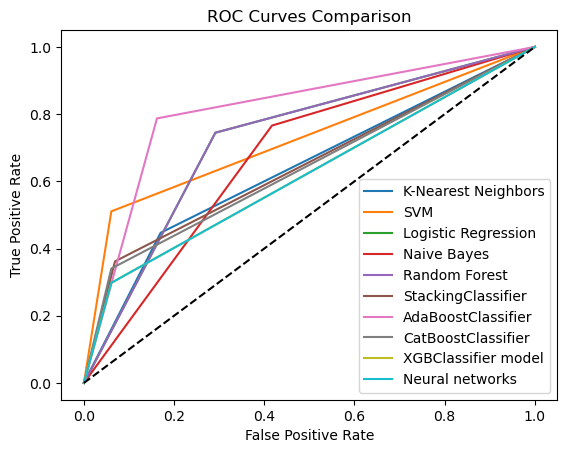

In [589]:
plt.plot(knm_fpr, knm_tpr, label='K-Nearest Neighbors')
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(lg_fpr, lg_tpr, label='Logistic Regression')
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes')
plt.plot(lg_fpr, lg_tpr, label='Random Forest')
plt.plot(stack_fpr, stack_tpr, label='StackingClassifier')
plt.plot(ada_fpr, ada_tpr, label='AdaBoostClassifier')
plt.plot(cat_fpr, cat_tpr, label='CatBoostClassifier')
plt.plot(xgb_fpr, xgb_tpr, label='XGBClassifier model')
plt.plot(nn_fpr, nn_tpr, label='Neural networks')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

* Precision-Recall Curves Comparison

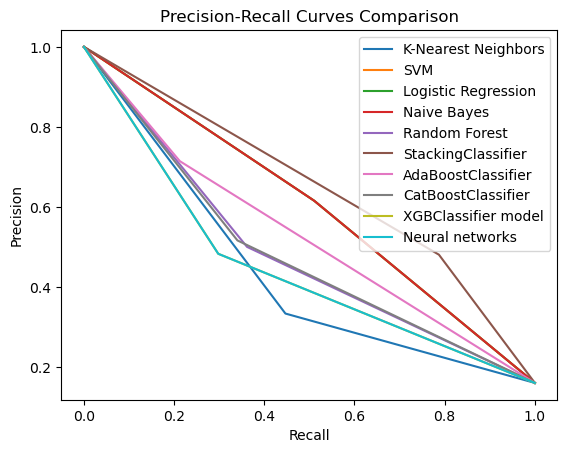

In [588]:
plt.plot(knm_recall, knm_precision, label='K-Nearest Neighbors')
plt.plot(svm_recall, svm_precision, label='SVM')
plt.plot(lg_recall, lg_precision, label='Logistic Regression')
plt.plot(lg_recall, lg_precision, label='Naive Bayes')
plt.plot(stack_recall, stack_precision, label='Random Forest')
plt.plot(ada_recall, ada_precision, label='StackingClassifier')
plt.plot(rf_recall, rf_precision, label='AdaBoostClassifier')
plt.plot(cat_recall, cat_precision, label='CatBoostClassifier')
plt.plot(xgb_recall, xgb_precision, label='XGBClassifier model')
plt.plot(nn_recall, nn_precision, label='Neural networks')
plt.xlabel('Recall') 
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison')
plt.legend()
plt.show() 

* Confusion Matrix Comparison

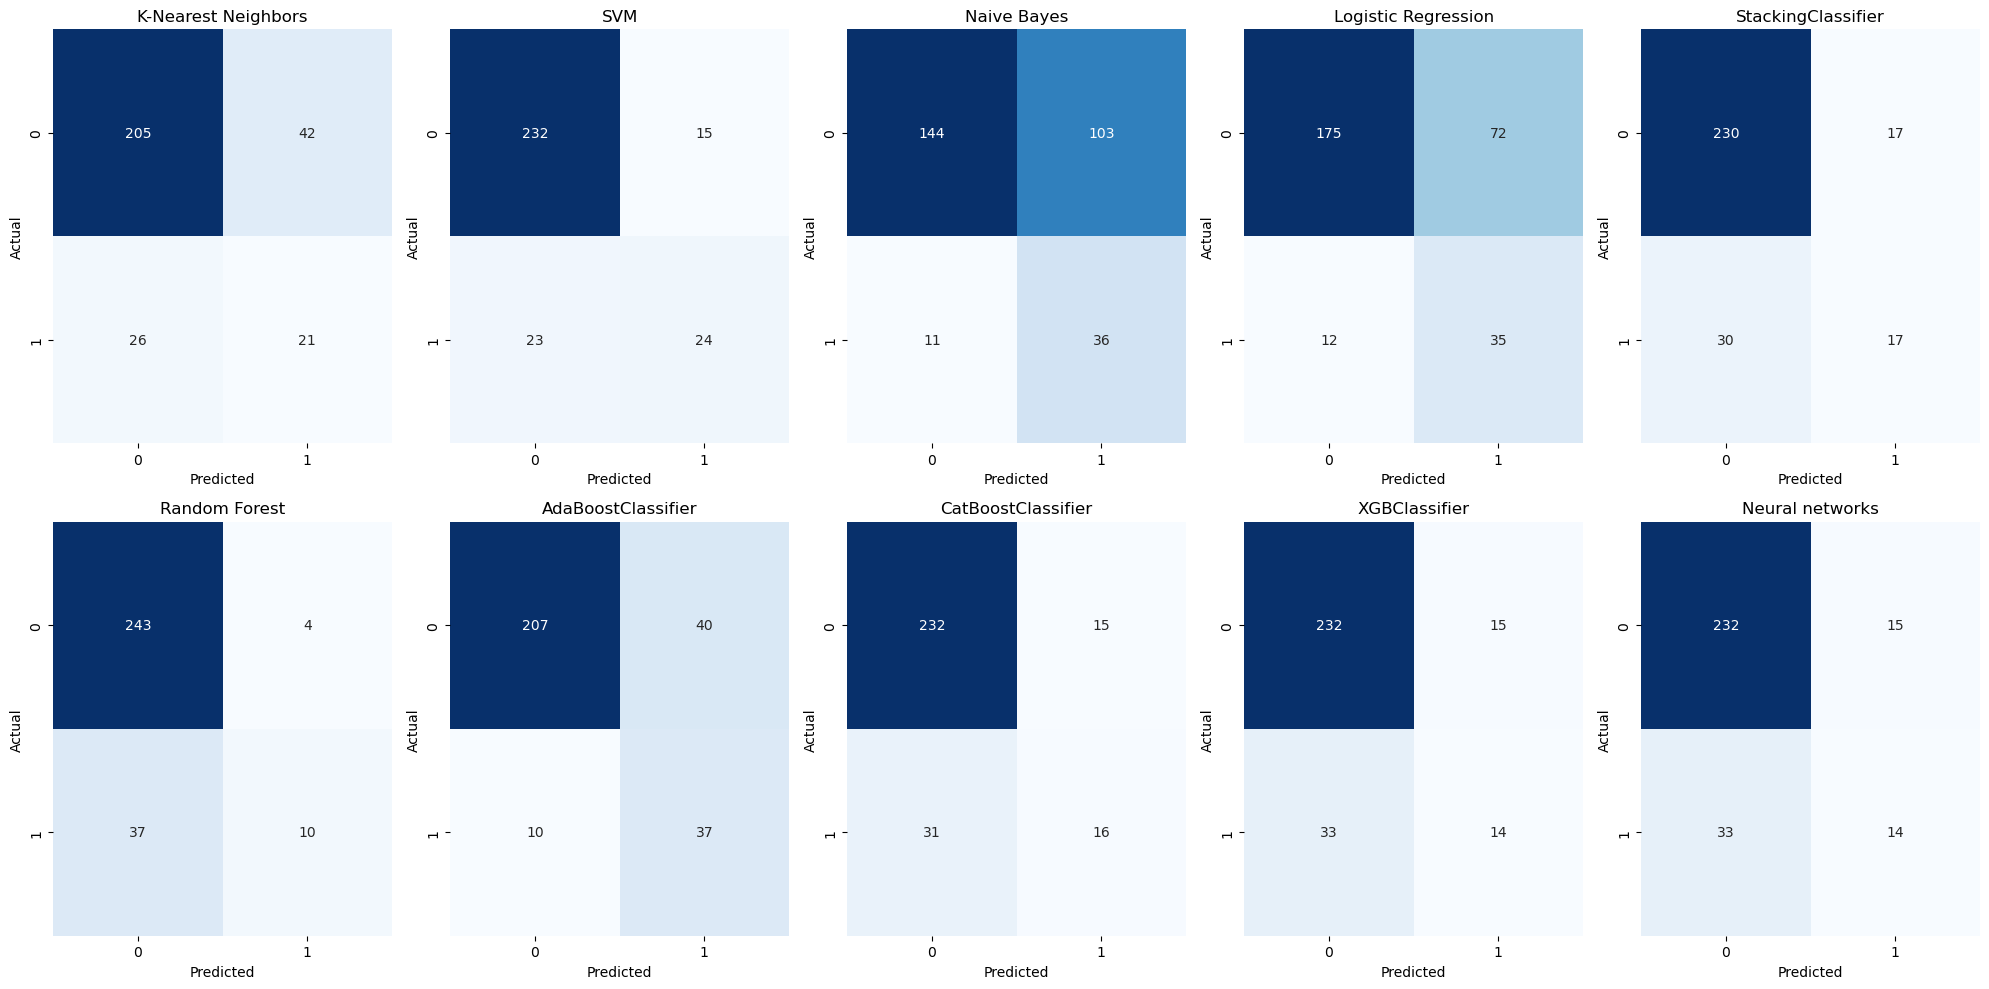

In [593]:
conf_matrices = [knm_conf_metrix, svm_conf_metrix, nb_conf_metrix, lg_conf_metrix,
                 stack_conf_metrix, rf_conf_metrix, ada_conf_metrix, 
                 cat_conf_metrix, xgb_conf_matrix, nn_conf_metrix]

model_titles = ['K-Nearest Neighbors', 'SVM', 'Naive Bayes', 'Logistic Regression', 
                'StackingClassifier', 'Random Forest', 'AdaBoostClassifier', 
                'CatBoostClassifier', 'XGBClassifier', 'Neural networks']

# Set up a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plot each confusion matrix in a separate subplot
for i, (conf_matrix, title) in enumerate(zip(conf_matrices, model_titles)):
    ax = axs[i // 5, i % 5]  # Determine position in 2x5 grid
    sb.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cbar=False, cmap='Blues')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

* Bar Chart Comparison

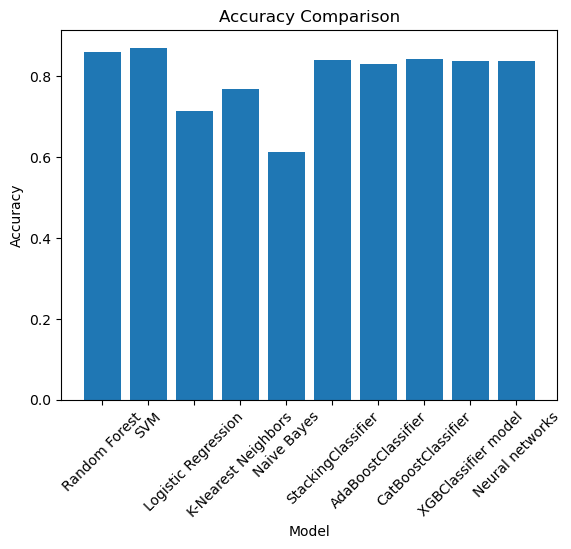

In [580]:
models = ['Random Forest', 'SVM', 'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes', 'StackingClassifier', 'AdaBoostClassifier', 'CatBoostClassifier', 'XGBClassifier model', 'Neural networks']
accuracies = [  rf_accuracy, svm_accuracy, lg_accuracy, knm_accuracy, nb_accuracy, stack_accuracy, ada_accuracy, cat_accuracy, xgb_accuracy, nn_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.show() 

* Box Plot Comparison

In [591]:
# models = ['Random Forest', 'SVM', 'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes', 'StackingClassifier', 'AdaBoostClassifier', 'CatBoostClassifier', 'XGBClassifier model', 'Neural networks']
# scores = [rf_scores, svm_scores, lg_scores, knm_scores, nb_scores, stack_scores, ada_scores, cat_scores, xgb_scores, nn_scores]
# plt.boxplot(scores, labels=models)
# plt.xlabel('Model')
# plt.ylabel('Score')
# plt.title('Score Comparison')
# plt.show() 